## 1. Business Problem Understanding

The hospitality industry faces significant challenges in managing bookings, cancellations, pricing strategies, and demand fluctuations. Understanding customer behavior is crucial for optimizing revenue, reducing cancellations, and enhancing customer satisfaction.

This analysis explores historical hotel booking data to uncover key patterns and trends. Additionally, we implement machine learning models to predict cancellations, forecast demand, segment customers, and optimize pricing strategies.

### 1.1. Problem Statement

Hotels face high cancellation rates, leading to:
-	Revenue loss due to cancellations.
-	Inefficient resource allocation (staff, room management).

Understanding cancellation behavior enables data-driven strategies for improved booking management.

### 1.2. Goals

This project aims to:
- Analyze factors influencing cancellations.
- Develop a predictive model to classify cancellations.
- Provide insights for hotels to minimize cancellations and improve revenue.

### 1.3. Analytical Approach

1 : Canceled

0 : Not Canceled

**The Impact of False Positive vs. False Negative in Hotel Booking Predictions**

When predicting hotel booking cancellations, a False Negative (failing to predict a cancellation when the guest does not show up) is more harmful than a False Positive (incorrectly predicting a cancellation when the guest actually shows up). This is because False Negatives result in unoccupied rooms, leading to revenue loss and operational inefficiencies.

**Why False Negatives Are More Costly:**

- Lost Revenue – An unoccupied room cannot generate revenue, leading to direct financial losses.

- Inefficient Resource Allocation – Hotel staff and resources are planned based on expected occupancy, so unexpected no-shows create inefficiencies.

While overbooking carries risks, False Negatives directly impact revenue because unoccupied rooms cannot be recovered. Therefore, reducing False Negatives is crucial for optimizing hotel occupancy and profitability.

**Evaluating Model Performance**

Both False Positives and False Negatives impact revenue, but since False Negatives lead to direct financial losses, we need a metric that prioritizes recall. The F2 Score is ideal for this scenario.

**What is the F2 Score?**
The F2 Score emphasizes recall more than precision, making it useful for minimizing False Negatives while still considering precision. It is particularly beneficial in hotel booking predictions where missed cancellations can result in financial losses.

- A low F2 Score indicates the model is failing to capture actual cancellations, leading to empty rooms and lost revenue.

- A high F2 Score means the model is effectively predicting cancellations, ensuring better occupancy management and revenue optimization.

By optimizing the F2 Score, hotels can implement better overbooking strategies, improve resource allocation, and reduce financial losses due to no-shows. This makes the prediction model a valuable tool for hotel management in maintaining efficiency and profitability.

**Step 1: Exploratory Data Analysis (EDA)**

We will explore:
- Cancellation trends
- Influencing factors
- Customer behavior

**Step 2: Machine Learning Model**

We will develop a classification model to predict whether a booking will be canceled.

Model Selection:
- Logistic Regression
- Decision Tree
- XGBoost
- Random Forest
- Light GBM

### 1.4. Evaluation Metrics

The model will be assessed using:
-	**Confusion Matrix** – To understand the distribution of True Positives, True Negatives, False Positives, and False Negatives.
-	**Accuracy** – Overall correctness of the model.
-	**Precision & Recall** – To balance false positives and false negatives.
-	**F2 Score** – A combined measure of precision and recall, placing greater emphasis on recall to minimize False Negatives.


## 2. Library & Dataset Preparation

Data sourse: [kaggle/jessemostipak/hotel-booking-demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

In [1]:
import pandas as pd
import numpy as np

# Data Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Train-Test split and CrossVal
from sklearn.model_selection import RandomizedSearchCV,StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# Transfrom & One-Hot Encoding
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder


# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, recall_score, precision_score, precision_recall_curve, make_scorer, balanced_accuracy_score
from sklearn.dummy import DummyClassifier

# Handling Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import joblib
import warnings
warnings.filterwarnings('ignore')

## 3. Data Understanding

The dataset consists of various features related to hotel bookings. Here’s a summary of the attributes:  

| **Attribute** | **Description** |
|--------------|----------------|
| `hotel` | Type of hotel: *City Hotel* or *Resort Hotel*. |
| `is_canceled` | Whether the booking was canceled (1) or not (0). |
| `lead_time` | Number of days between booking and check-in. |
| `arrival_date_year` | Year of arrival. |
| `arrival_date_month` | Month of arrival. |
| `arrival_date_week_number` | Week number of arrival. |
| `arrival_date_day_of_month` | Day of the month for arrival. |
| `stays_in_weekend_nights` | Number of weekend nights booked (Saturday/Sunday). |
| `stays_in_week_nights` | Number of weekday nights booked (Monday-Friday). |
| `adults` | Number of adults in the booking. |
| `children` | Number of children in the booking. |
| `babies` | Number of babies in the booking. |
| `meal` | Type of meal plan chosen. |
| `country` | Country of the guest (ISO country code). |
| `market_segment` | Booking source (Online, Offline, Corporate, etc.). |
| `distribution_channel` | Distribution channel used for booking. |
| `is_repeated_guest` | 1 if the guest has stayed before, 0 otherwise. |
| `previous_cancellations` | Number of previous cancellations by the guest. |
| `previous_bookings_not_canceled` | Number of previous successful bookings. |
| `reserved_room_type` | Room type booked by the guest. |
| `assigned_room_type` | Actual room type assigned. |
| `booking_changes` | Number of changes made to the booking. |
| `deposit_type` | Type of deposit: *No Deposit*, *Non Refundable*, or *Refundable*. |
| `agent` | ID of the travel agency handling the booking. |
| `company` | ID of the company making the booking (if applicable). |
| `days_in_waiting_list` | Number of days the booking was on the waiting list. |
| `customer_type` | Type of customer (Transient, Contract, etc.). |
| `adr` (Average Daily Rate) | Average price per night in Euros. |
| `required_car_parking_spaces` | Number of parking spaces requested. |
| `total_of_special_requests` | Number of special requests made. |
| `reservation_status` | Final status of the reservation (*Canceled*, *Check-Out*, *No-Show*). |
| `reservation_status_date` | Date when the reservation status was last updated. |

In [2]:
#Load Dataset
file_path = r'hotel_bookings.csv'
df = pd.read_csv(file_path)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel_desc = pd.DataFrame(columns=['Feature', 'Total Unique', 'Unique Value'],
                     data=listItem)
tabel_desc

,Feature,Total Unique,Unique Value
0,hotel,2,"[Resort Hotel, City Hotel]"
1,is_canceled,2,"[0, 1]"
2,lead_time,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15..."
3,arrival_date_year,3,"[2015, 2016, 2017]"
4,arrival_date_month,12,"[July, August, September, October, November, December, January, February, March, April, May, June]"
5,arrival_date_week_number,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 2, 3..."
6,arrival_date_day_of_month,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
7,stays_in_weekend_nights,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18, 19, 10, 14]"
8,stays_in_week_nights,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12, 33, 20, 14, 16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 1..."
9,adults,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


## 4. Data Cleaning

### 4.1. Handling for Missing Values

To handle missing values, we apply the following strategies:  

- **`children` column** → Fill with `0` (since some bookings might only include adults).  
- **`country` column** → Fill with `"Unknown"` (as some entries might not have recorded the country).  
- **`agent` and `company` columns** → Fill with `0`, as they are IDs (where `0` means no agent/company was involved).  

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [6]:
# Fill missing values without inplace=True to avoid warnings
df = df.assign(
    children=df['children'].fillna(0),
    country=df['country'].fillna('Unknown'),
    agent=df['agent'].fillna(0),
    company=df['company'].fillna(0)
)

# Confirm that there are no missing values left
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### 4.2. Handling Duplicate Data

In [7]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df = df.drop_duplicates()

# Confirm removal
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 31994
Number of duplicate rows after removal: 0


### 4.3. Handling Data Types

Some columns may have incorrect data types and need conversion:  

- **`reservation_status_date`** → Convert to `datetime`.  
- **`agent` and `company`** → Convert to `int` since they represent ID numbers.  

In [8]:
# Convert columns to appropriate data types
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

# Confirm the changes
print(df.dtypes[['reservation_status_date', 'agent', 'company']])

reservation_status_date    datetime64[ns]
agent                               int32
company                             int32
dtype: object


### 4.4. Handling Outliers

Remove the outliers in ADR column with value more than 5000 EUR.

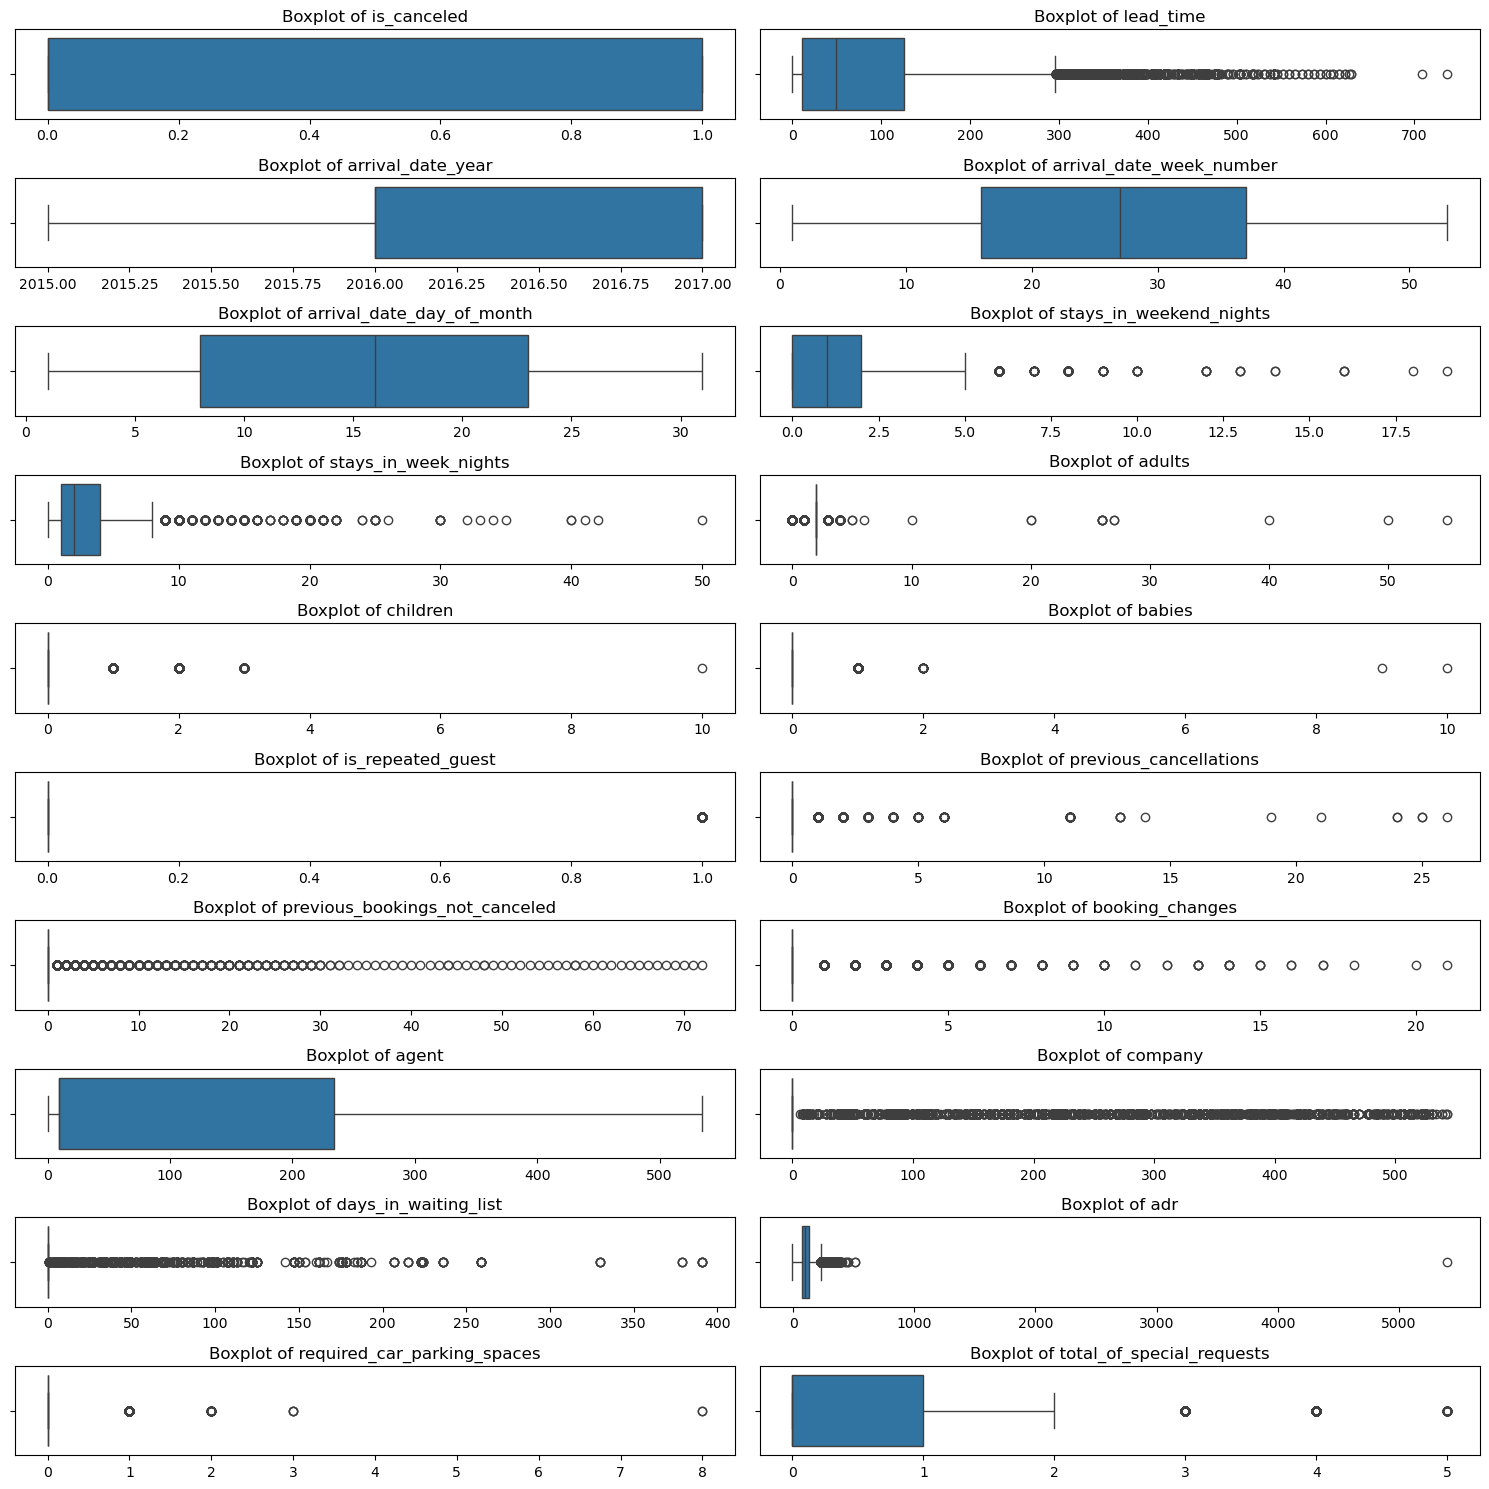

In [9]:
# Select only integer and float columns
num_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 15))

# Create boxplots for each numeric column
for i, column in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 1) // 2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()

plt.show()


In [10]:
# Remove outlier in ADR
df = df[df['adr']<1000]

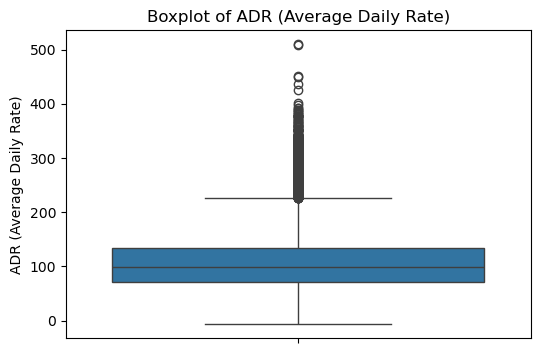

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['adr'])
plt.title('Boxplot of ADR (Average Daily Rate)')
plt.ylabel('ADR (Average Daily Rate)')
plt.show()

Removing outlier in `adr` with value above 1000 to ensures a more accurate and reliable dataset. These outlier can be caused by data entry errors, special cases, or unrealistic rates. Keeping them may distort analysis and negatively affect machine learning models.

- `ADR` (Average Daily Rate) majority values are cencentrated between 50 and 150.

### 4.5. Handling Invalid Values

Some data points may not make sense, such as:  

- `adults`, `children`, `babies` **= 0** → A booking should have at least one guest.  
- `adr` (Average Daily Rate) **negative values** → A nightly rate should not be negative.  

In [12]:
# Remove rows where total number of guests is 0
df = df[(df['adults'] + df['children'] + df['babies']) > 0]

# Remove rows where ADR is negative
df = df[df['adr'] >= 0]

# Confirm the number of rows after cleaning
print(f"Number of rows after cleaning: {len(df)}")

Number of rows after cleaning: 87228


## 5. Exploratory Data Analysis

### 5.1. Summary Statistics

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.00000,87228.000000,...,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228.000000,87228
mean,0.275233,79.970216,2016.210345,26.835443,15.815850,1.004586,2.623905,1.879362,0.13890,0.010845,...,0.030403,0.184035,0.268469,81.087850,10.985200,0.746309,106.458639,0.084308,0.698950,2016-08-31 02:54:20.751134976
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-05 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.00000,10.000000,...,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446634,86.058654,0.686066,13.669173,8.835516,1.027365,2.039814,0.621731,0.45627,0.113705,...,0.369349,1.733042,0.710612,109.976348,53.957261,10.001115,51.881832,0.281662,0.832054,NaN


### 5.2. Booking Overview by Hotel Type

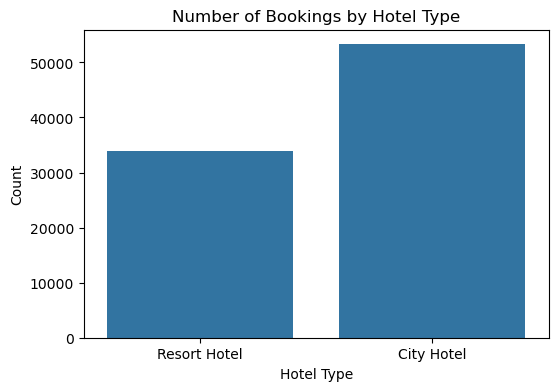

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['hotel'])
plt.title('Number of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

In [15]:
# Count occurrences of each hotel type
hotel_counts = df['hotel'].value_counts()

# Extract counts for Resort Hotel and City Hotel
resort_hotel_count = hotel_counts.get("Resort Hotel", 0)
city_hotel_count = hotel_counts.get("City Hotel", 0)

# Display the counts
resort_hotel_count, city_hotel_count

(33955, 53273)

**Insight:**

City Hotels are more popular or more frequently booked than Resort Hotels.

### 5.3. Cancellation Distribution by Hotel Type

In [16]:
cancel_rate = df['is_canceled'].mean() * 100
print(f"Cancellation Rate: {cancel_rate:.2f}%")

Cancellation Rate: 27.52%


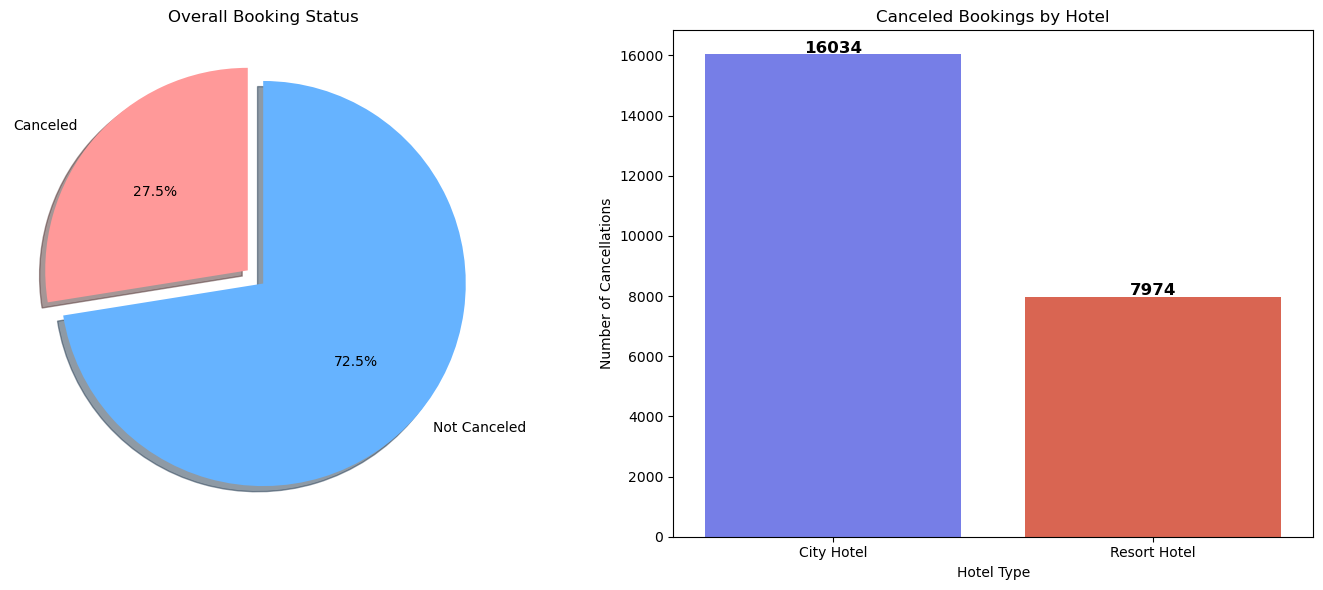

In [17]:
canceled_data = df[df['is_canceled'] == 1]

canceled_counts = canceled_data['hotel'].value_counts().reset_index()
canceled_counts.columns = ['Hotel', 'Cancellations']

total_canceled = len(canceled_data)
total_not_canceled = len(df) - total_canceled

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    [total_canceled, total_not_canceled], 
    labels=['Canceled', 'Not Canceled'], 
    autopct='%1.1f%%', 
    colors=['#FF9999', '#66B3FF'],
    startangle=90, 
    explode=(0.1, 0), 
    shadow=True
)
axes[0].set_title("Overall Booking Status")

sns.barplot(
    data=canceled_counts, 
    x='Hotel', 
    y='Cancellations', 
    hue='Hotel',
    palette=['#636EFA', '#EF553B'], 
    ax=axes[1],
    legend=False
)
axes[1].set_title("Canceled Bookings by Hotel")
axes[1].set_xlabel("Hotel Type")
axes[1].set_ylabel("Number of Cancellations")

for i, value in enumerate(canceled_counts['Cancellations']):
    axes[1].text(i, value + 50, str(value), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**Insight:**

Overall, 27.5% of bookings were canceled, indicating a significant portion of revenue at risk if not properly managed.

City Hotels experienced the highest number of cancellations (16,034), despite having more bookings. In contrast, Resort Hotels had fewer cancellations (7,974), suggesting greater booking commitment.

This pattern may reflect the nature of the guests—City Hotel bookings are likely influenced by business travelers with changing schedules or last-minute adjustments, whereas Resort bookings are typically made for leisure or planned vacations, which guests are more likely to follow through.

### 5.4. Lead Time vs Cancellation

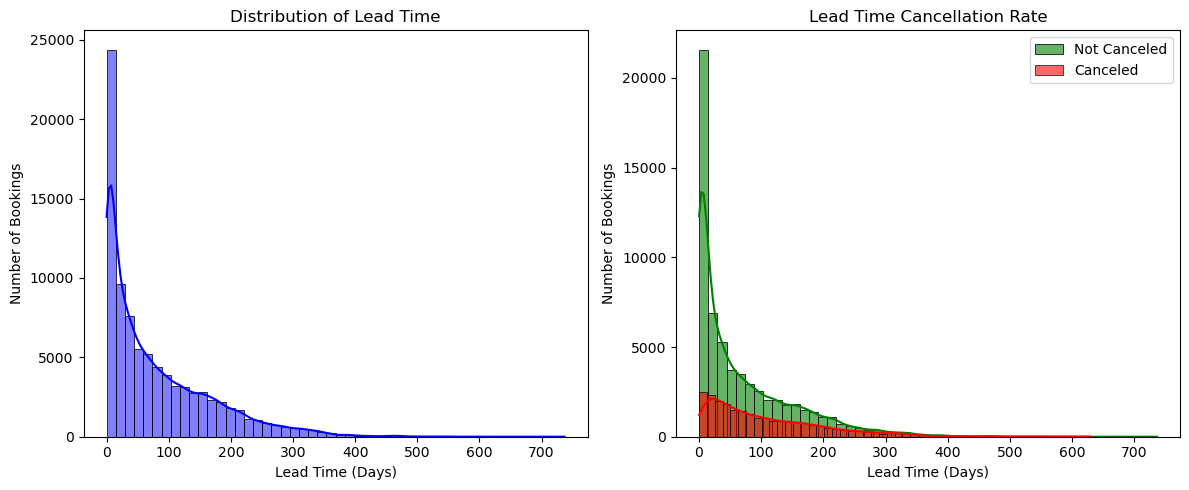

In [18]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')

plt.subplot(1,2,2)
sns.histplot(df[df['is_canceled'] == 0]['lead_time'], bins=50, kde=True, color='green', label='Not Canceled', alpha=0.6)
sns.histplot(df[df['is_canceled'] == 1]['lead_time'], bins=50, kde=True, color='red', label='Canceled', alpha=0.6)
plt.title('Lead Time Cancellation Rate')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**

Lead time is the number of days between booking a hotel and the check-in date. Most bookings happen within 0–50 days before check-in, this means many people book hotels last-minute, often for spontaneous trips or urgent travel.

However, cancellations are more frequent for bookings made well in advance. As the lead time increases beyond 50 days, the proportion of canceled bookings becomes more noticeable. This suggests that guests who book early may be more likely to change their plans, leading to higher cancellation rates.

Longer lead times correlate strongly with higher cancellation rates, possibly due to uncertainty or changes in customer plans. Hotels might benefit from a stricter cancellation policy or confirmation follow-up when lead times are extensive.

### 5.5. Average Daily Rate (ADR) Impact

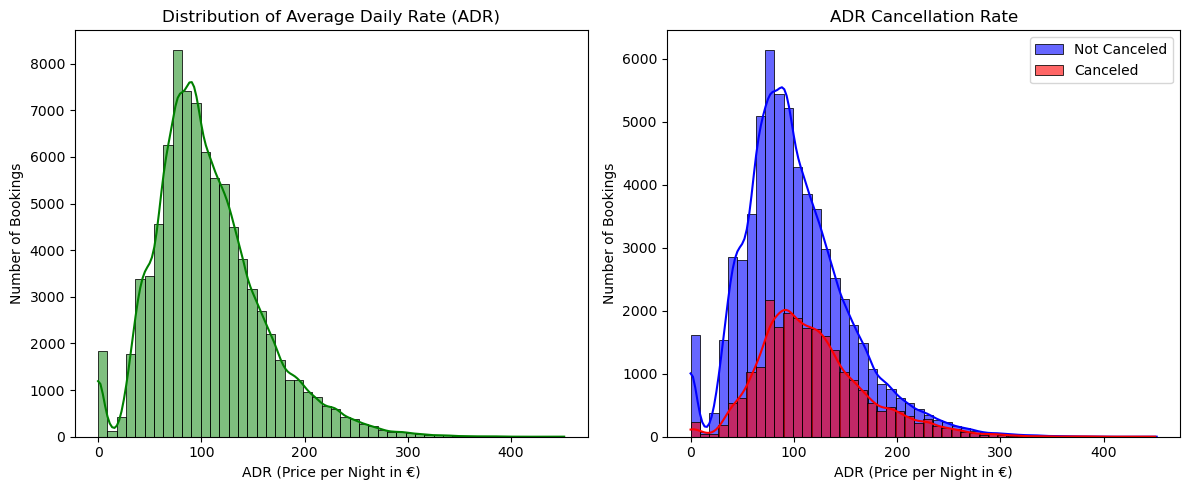

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df[df['adr'] < 500]['adr'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Daily Rate (ADR)')
plt.xlabel('ADR (Price per Night in €)')
plt.ylabel('Number of Bookings')

plt.subplot(1,2,2)
sns.histplot(df[(df['adr'] < 500) & (df['is_canceled'] == 0)]['adr'], bins=50, kde=True, color='blue', label='Not Canceled', alpha=0.6)
sns.histplot(df[(df['adr'] < 500) & (df['is_canceled'] == 1)]['adr'], bins=50, kde=True, color='red', label='Canceled', alpha=0.6)
plt.title('ADR Cancellation Rate')
plt.xlabel('ADR (Price per Night in €)')
plt.ylabel('Number of Bookings')
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**

- Most guests (city and resort hotels) stay between 1–4 nights.

- City hotels notably have a higher percentage of short stays (1–3 nights), while resort hotels show higher proportions for extended stays (up to 7 nights).

- Most room rates per night range between 50 and 150 euros, with a peak around 100 euros. The distribution is right-skewed, meaning there are some much higher room rates, but they occur less frequently.

- The cancelation graph shows that cancellation rates tend to be higher for bookings with higher ADR, especially between 100 and 200 euros. This suggests that customers are more likely to cancel their reservations when room prices are higher.

City hotels primarily serve short-term guests, often business-related. Resort hotels accommodate vacationers, reflected by longer stays. Marketing and management strategies should reflect these patterns.




### 5.6. Length of Stay Patterns

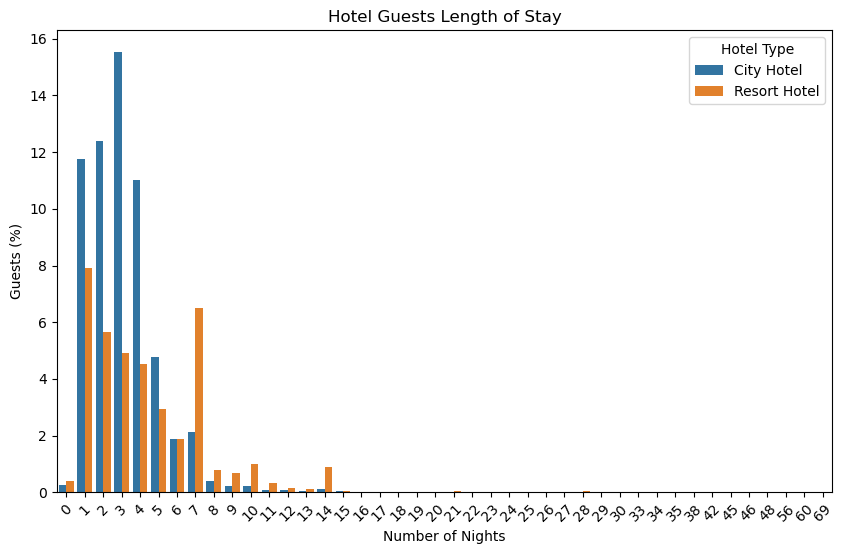

In [20]:
df['number_of_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

city_df = df[df['hotel'] == 'City Hotel']
resort_df = df[df['hotel'] == 'Resort Hotel']

city_nights = city_df.groupby('number_of_nights')['hotel'].count().reset_index(name='guests')
city_nights['hotel'] = 'City Hotel'

resort_nights = resort_df.groupby('number_of_nights')['hotel'].count().reset_index(name='guests')
resort_nights['hotel'] = 'Resort Hotel'

full_night_data = pd.concat([city_nights, resort_nights], ignore_index=True)

total_guests = full_night_data['guests'].sum()
full_night_data['percentage'] = (full_night_data['guests'] / total_guests) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=full_night_data, x='number_of_nights', y='percentage', hue='hotel')

plt.xlabel("Number of Nights")
plt.ylabel("Guests (%)")
plt.title("Hotel Guests Length of Stay")

plt.xticks(rotation=45)

plt.legend(title="Hotel Type")
plt.show()


**Insight:**

Most guests stay between 1–4 nights, but City Hotels tend to host shorter stays (1–3 nights), likely catering to business travelers or quick visits. In contrast, Resort Hotels show a higher share of longer stays (up to 7 nights), aligning with leisure and vacation-oriented guests.

These differences suggest that marketing, pricing, and service strategies should be tailored—City Hotels may benefit from business-focused packages, while Resort Hotels should emphasize extended-stay deals and vacation experiences.

### 5.7. Monthly Trends in Bookings & Cancellations

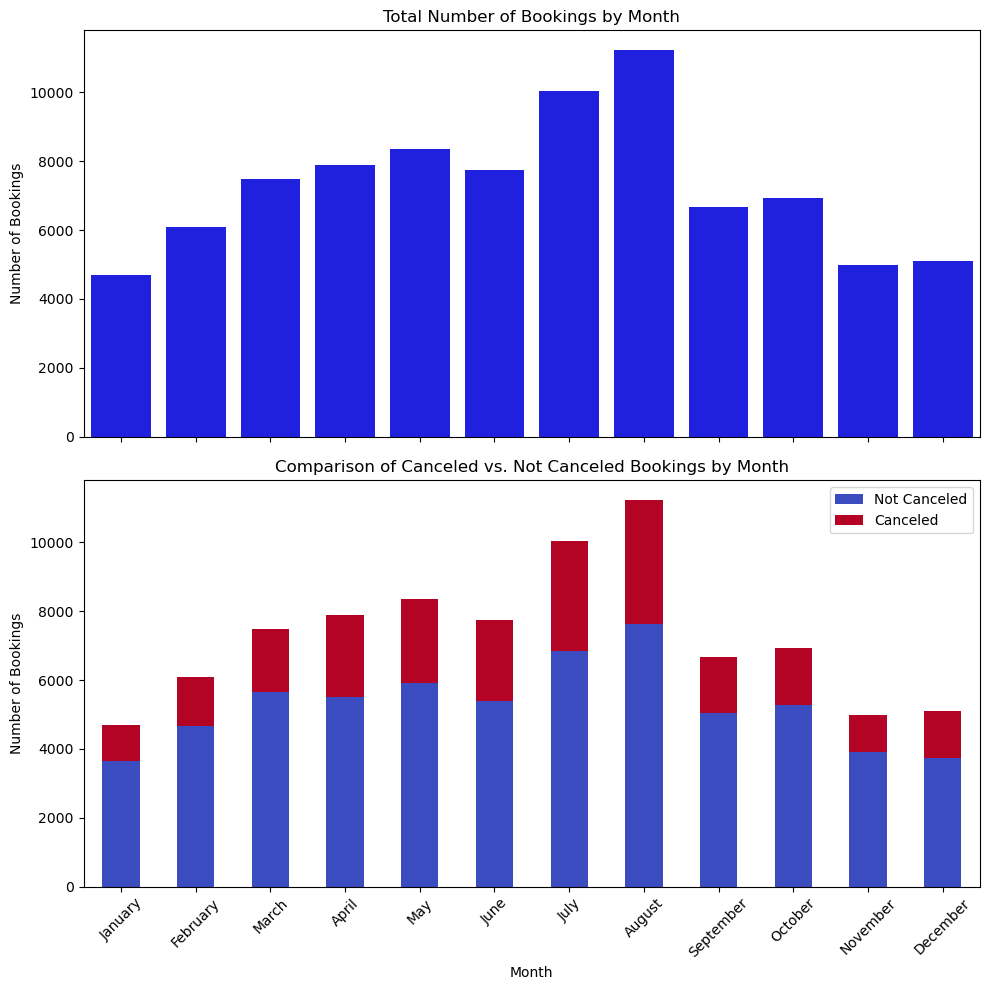

In [21]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

booking_counts = df['arrival_date_month'].value_counts().reindex(month_order, fill_value=0)

cancel_counts = df.groupby(['arrival_date_month', 'is_canceled'])['is_canceled'].count().unstack().reindex(month_order, fill_value=0)

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

sns.barplot(x=booking_counts.index, y=booking_counts.values, ax=axes[0], color='blue')
axes[0].set_title('Total Number of Bookings by Month')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

cancel_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')
axes[1].set_title('Comparison of Canceled vs. Not Canceled Bookings by Month')
axes[1].set_ylabel('Number of Bookings')
axes[1].set_xlabel('Month')
axes[1].legend(['Not Canceled', 'Canceled'])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

July and August have the highest total number of bookings, with August experiencing the highest number of cancellations. Cancellation rates tend to be higher during peak months when overall booking volume increases. Meanwhile, January and December have the lowest total bookings, with relatively fewer cancellations.
This suggests that cancellation patterns may be influenced by seasonal demand, with more cancellations occurring during peak travel months, possibly due to price sensitivity, overbooked hotels, or last-minute changes in travel plans.


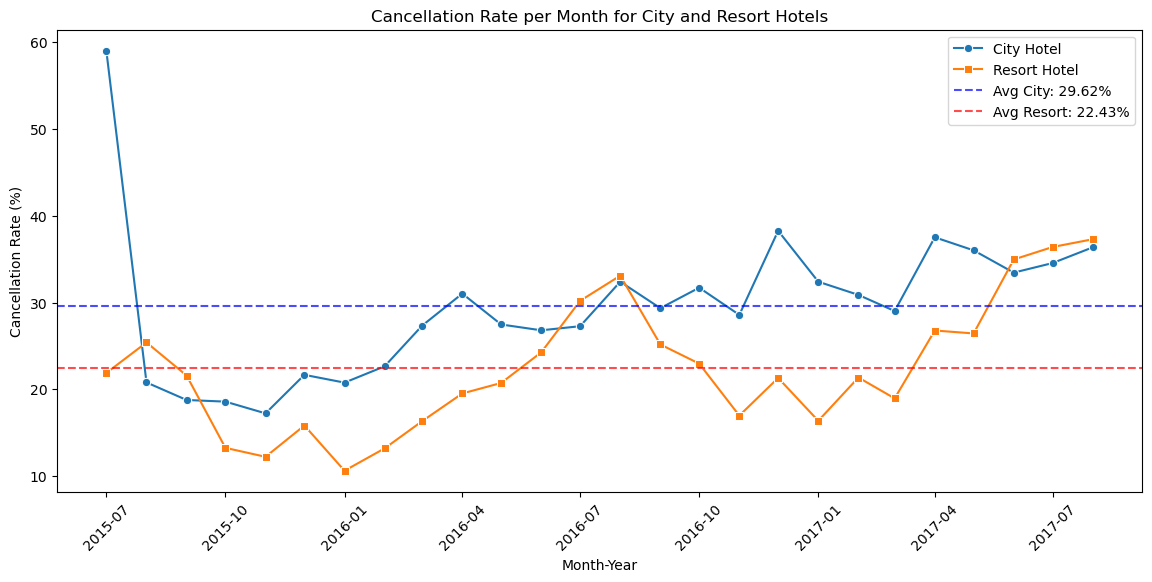

In [22]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                     df['arrival_date_month'], format='%Y-%B')

df['is_canceled'] = df['is_canceled'].astype(int)

monthly_cancellations = df.groupby([df['arrival_date'], 'hotel']).agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

monthly_cancellations['cancellation_rate'] = (monthly_cancellations['total_cancellations'] / 
                                               monthly_cancellations['total_bookings']) * 100

city_hotel = monthly_cancellations[monthly_cancellations['hotel'] == 'City Hotel']
resort_hotel = monthly_cancellations[monthly_cancellations['hotel'] == 'Resort Hotel']

plt.figure(figsize=(14, 6))  

sns.lineplot(data=city_hotel, x='arrival_date', y='cancellation_rate', label="City Hotel", marker='o')

sns.lineplot(data=resort_hotel, x='arrival_date', y='cancellation_rate', label="Resort Hotel", marker='s')

city_avg_cancellation = city_hotel['cancellation_rate'].mean()
resort_avg_cancellation = resort_hotel['cancellation_rate'].mean()

plt.axhline(city_avg_cancellation, color='blue', linestyle='dashed', alpha=0.7, label=f'Avg City: {city_avg_cancellation:.2f}%')
plt.axhline(resort_avg_cancellation, color='red', linestyle='dashed', alpha=0.7, label=f'Avg Resort: {resort_avg_cancellation:.2f}%')

plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate per Month for City and Resort Hotels")
plt.legend()

plt.show()


In [23]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                     df['arrival_date_month'], format='%Y-%B')

df['is_canceled'] = df['is_canceled'].astype(int)

monthly_cancellations = df.groupby([df['arrival_date'], 'hotel']).agg(
    total_bookings=('is_canceled', 'size'),
    total_cancellations=('is_canceled', 'sum')
).reset_index()

monthly_cancellations['cancellation_rate'] = (monthly_cancellations['total_cancellations'] / 
                                               monthly_cancellations['total_bookings']) * 100

cancellation_table = monthly_cancellations.pivot(index='arrival_date', columns='hotel', values='cancellation_rate')

cancellation_table.columns = ['City Hotel', 'Resort Hotel']

cancellation_table.reset_index(inplace=True)

print(cancellation_table)


   arrival_date  City Hotel  Resort Hotel
0    2015-07-01   59.033079     21.892103
1    2015-08-01   20.799273     25.408618
2    2015-09-01   18.776245     21.593830
3    2015-10-01   18.585209     13.257243
4    2015-11-01   17.232704     12.226067
5    2015-12-01   21.674877     15.833333
6    2016-01-01   20.776699     10.622711
7    2016-02-01   22.658610     13.199301
8    2016-03-01   27.349704     16.336295
9    2016-04-01   31.037344     19.528371
10   2016-05-01   27.478632     20.737648
11   2016-06-01   26.806833     24.269481
12   2016-07-01   27.280065     30.205279
13   2016-08-01   32.407407     33.105165
14   2016-09-01   29.356725     25.175370
15   2016-10-01   31.718395     22.965300
16   2016-11-01   28.584861     16.976351
17   2016-12-01   38.275340     21.317158
18   2017-01-01   32.408501     16.374781
19   2017-02-01   30.888430     21.364985
20   2017-03-01   29.028340     18.959732
21   2017-04-01   37.528174     26.784500
22   2017-05-01   36.022208     26

- City Hotels have a higher average cancellation rate (29.62%) than Resort Hotels (22.43%).
- City Hotels higest cancelation rate in July 2015 (59.03%) and lowest in November 2015 (17.23%).
- Resort Hotels highest cancelation rate in August 2017 (37.30%) and lowest in January 2016 (10.62%).
- Cancellation rates fluctuate over time, with peaks in summer (June–August) due to flexible bookings and last-minute changes.

**Insight:**

Seasonality Effect: Higher cancellations in summer months (July-August), possibly due to increased demand and last-minute changes.

City Hotels More Affected: City hotels consistently experience higher cancellations than resort hotels.

Overall Rising Trend: Cancellation rates for both types of hotels show an increasing trend toward 2017.

Potential Influences: Factors like pricing, flexible cancellation policies, or economic conditions could contribute to the variations.

### 5.8. Guest Origins: Geographical Insights

In [24]:
if 'country' in df.columns:
    country_counts = df['country'].value_counts().reset_index()
    country_counts.columns = ['Country', 'Guest Count']
    country_counts = country_counts[country_counts['Country'].notnull()]

    total_guests = country_counts['Guest Count'].sum()
    country_counts['Guests in %'] = (country_counts['Guest Count'] / total_guests) * 100

    country_counts.set_index('Country', inplace=True)

    guest_map = go.Choropleth(
        locations=country_counts.index,  
        z=country_counts['Guests in %'],  
        hoverinfo='location+z',  
        colorscale='YlGnBu',  
        reversescale=True,  
        colorbar_title="Guests in %", 
    )

    fig = go.Figure(guest_map)

    fig.update_layout(
        title="Geographical Distribution of Hotel Guests by Country (Percentage)",
        geo=dict(
            showcoastlines=True,
            coastlinecolor="Black",
            projection_type="natural earth",
            lakecolor="white", 
            projection_scale=7,
        ),
        height=700,  
        width=1000, 
    )

    fig.show()
else:
    print("Column 'country' not found in DataFrame.")


In [25]:
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Guest Count']

total_guests = country_counts['Guest Count'].sum()
country_counts['Percentage'] = (country_counts['Guest Count'] / total_guests) * 100

guest_distribution = country_counts[['Country', 'Percentage']].head(10)

print(guest_distribution.to_string(index=False))


Country  Percentage
    PRT   31.359197
    GBR   11.949145
    FRA   10.114871
    ESP    8.304673
    DEU    6.173476
    ITA    3.509194
    IRL    3.456459
    BEL    2.385702
    BRA    2.284817
    NLD    2.189664


**Geographical Distribution of Hotel Guests:**

Guests come from various parts of the world. Since the dataset is from Portugal, most guests are from European countries, mainly `Portugal` (31.36%), followed by `Great Britain` (11.95%), `France` (10.11%), `Spain` (8.30%), `Germany` (6.17%), and `Italy` (3.51%).

**Calcelation rate ditribution**

In [26]:
if 'country' in df.columns and 'is_canceled' in df.columns:
    canceled_df = df[df['is_canceled'] == 1]

    canceled_counts = canceled_df['country'].value_counts().reset_index()
    canceled_counts.columns = ['Country', 'Cancellations']
    canceled_counts = canceled_counts[canceled_counts['Country'].notnull()]

    total_cancellations = canceled_counts['Cancellations'].sum()
    canceled_counts['Cancellations in %'] = (canceled_counts['Cancellations'] / total_cancellations) * 100

    canceled_counts.set_index('Country', inplace=True)

    cancel_map = go.Choropleth(
        locations=canceled_counts.index,  
        locationmode='ISO-3',  
        z=canceled_counts['Cancellations in %'],  
        text=canceled_counts.index,  
        colorscale='Reds',  
        reversescale=False,  
        marker_line_color='black',  
        colorbar_title="Cancellations in %",
    )

 
    fig = go.Figure(cancel_map)

    fig.update_layout(
        title="Geographical Distribution of Cancellations by Country (Percentage)",
        geo=dict(
            showcoastlines=True,
            coastlinecolor="Black",
            projection_type="natural earth",
            lakecolor="white", 
            showframe=False,  
        ),
        height=700,  
        width=1000, 
    )

    fig.show()
else:
    print("Column 'country' or 'is_canceled' not found in DataFrame.")

In [27]:
country_counts = canceled_df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Guest Count']

total_guests = country_counts['Guest Count'].sum()
country_counts['Percentage'] = (country_counts['Guest Count'] / total_guests) * 100

guest_distribution = country_counts[['Country', 'Percentage']].head(10)

print(guest_distribution.to_string(index=False))


Country  Percentage
    PRT   40.740586
    GBR    8.263912
    ESP    7.755748
    FRA    7.214262
    ITA    4.477674
    DEU    4.386038
    BRA    3.028157
    IRL    2.782406
    USA    1.911863
    BEL    1.711929


**Insight:**

Cancellation rates vary notably by country. Portugal (40.74%) shows the highest rate, likely due to proximity to the hotels, flexible travel habits, or local booking behavior. The UK (8.26%), Spain (7.76%), and France, Italy, and Germany (4–7%) show moderate rates.

In contrast, Brazil (3.03%), Ireland (2.78%), the USA (1.91%), and Belgium (1.71%) have significantly lower cancellation rates, indicating that long-haul international travelers are more committed, likely due to stricter travel planning and longer distances.

This highlights a trend: domestic and regional guests tend to cancel more frequently, while international travelers are more likely to follow through with their bookings.

### 5.9. Market Segment Performance

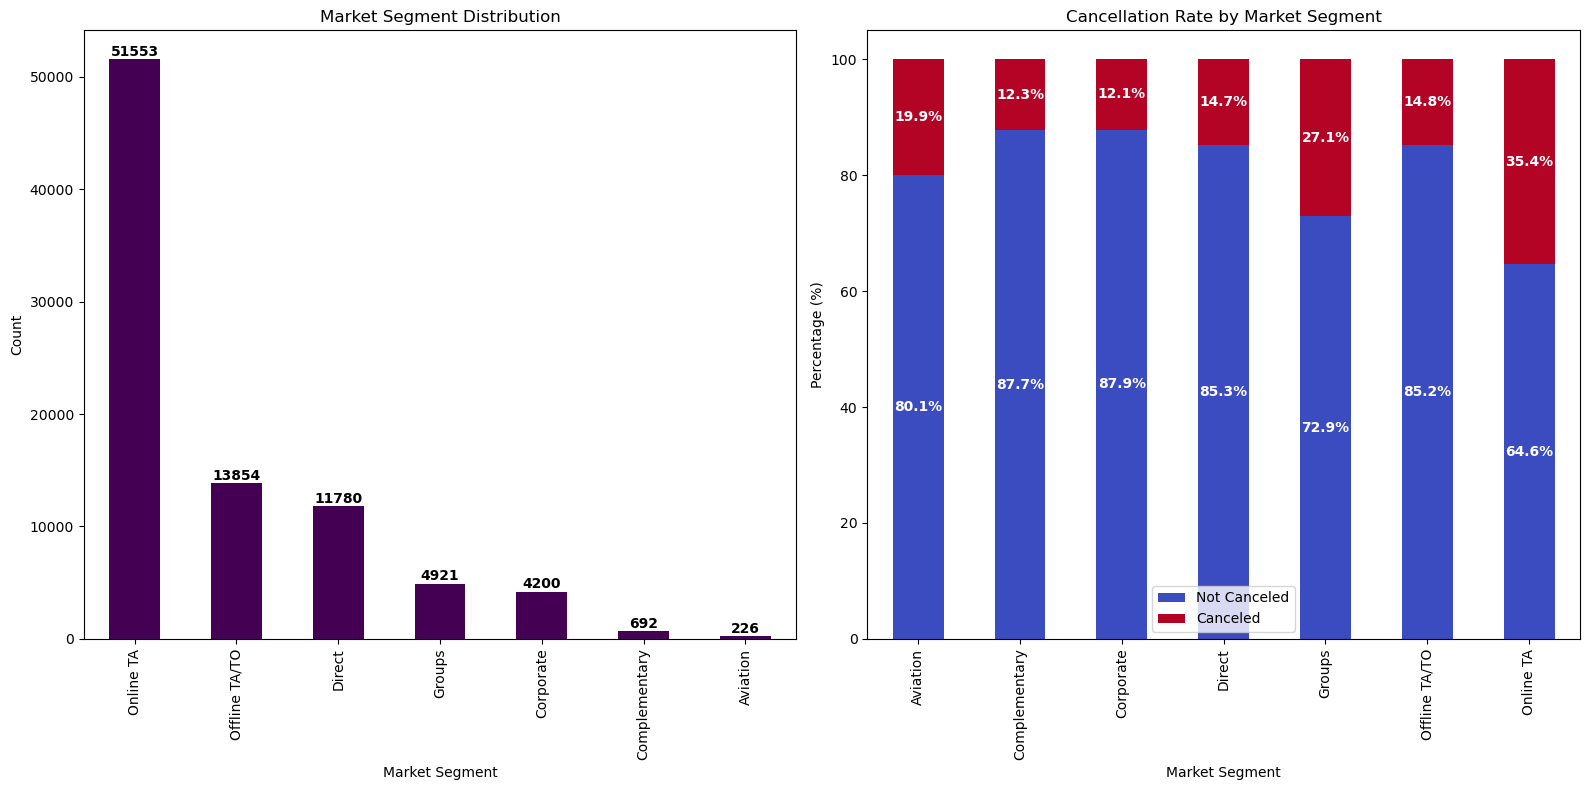

In [28]:
market_segment_counts = df['market_segment'].value_counts()

market_segment_cancel_counts = df.groupby(['market_segment', 'is_canceled']).size().unstack().fillna(0)

market_segment_counts = market_segment_counts[market_segment_counts.index != 'Undefined']
market_segment_cancel_counts = market_segment_cancel_counts.loc[market_segment_cancel_counts.index != 'Undefined']

market_segment_cancel_percentage = market_segment_cancel_counts.div(market_segment_cancel_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar Chart 1: Market Segment Distribution
market_segment_counts.plot(kind='bar', colormap='viridis', ax=axes[0])
axes[0].set_title('Market Segment Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Market Segment')

for idx, count in enumerate(market_segment_counts):
    axes[0].text(idx, count + 50, f"{count}", ha='center', va='bottom', fontsize=10, fontweight='bold')


# Bar Chart 2: Cancellation Rate by Market Segment
market_segment_cancel_percentage.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])
axes[1].set_title('Cancellation Rate by Market Segment')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('Market Segment')
axes[1].legend(['Not Canceled', 'Canceled'])

for idx, (not_canceled, canceled) in enumerate(zip(market_segment_cancel_percentage[0], market_segment_cancel_percentage[1])):
    x = idx
    axes[1].text(x, not_canceled / 2, f"{not_canceled:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    axes[1].text(x, not_canceled + (canceled / 2), f"{canceled:.1f}%", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [29]:
df.query("market_segment == 'Undefined'")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,number_of_nights,arrival_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,...,0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01,1,2015-08-01
40679,City Hotel,1,1,2015,August,32,5,0,2,3,...,0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04,2,2015-08-01


**Insight:**

Online Travel Agencies (OTAs) contribute the largest share of bookings but also account for the highest cancellation rate (35.4%), likely due to the ease of modifying or canceling reservations. In contrast, Corporate bookings show the lowest cancellation rate (~12%), reflecting more stable and committed travel plans.

This pattern suggests that online channels, while essential for volume, also carry higher cancellation risk. Encouraging direct bookings through exclusive incentives or loyalty programs could help reduce dependency on OTAs, minimizing cancellations and avoiding commission-related costs.

### 5.10. Cancellation History Effect

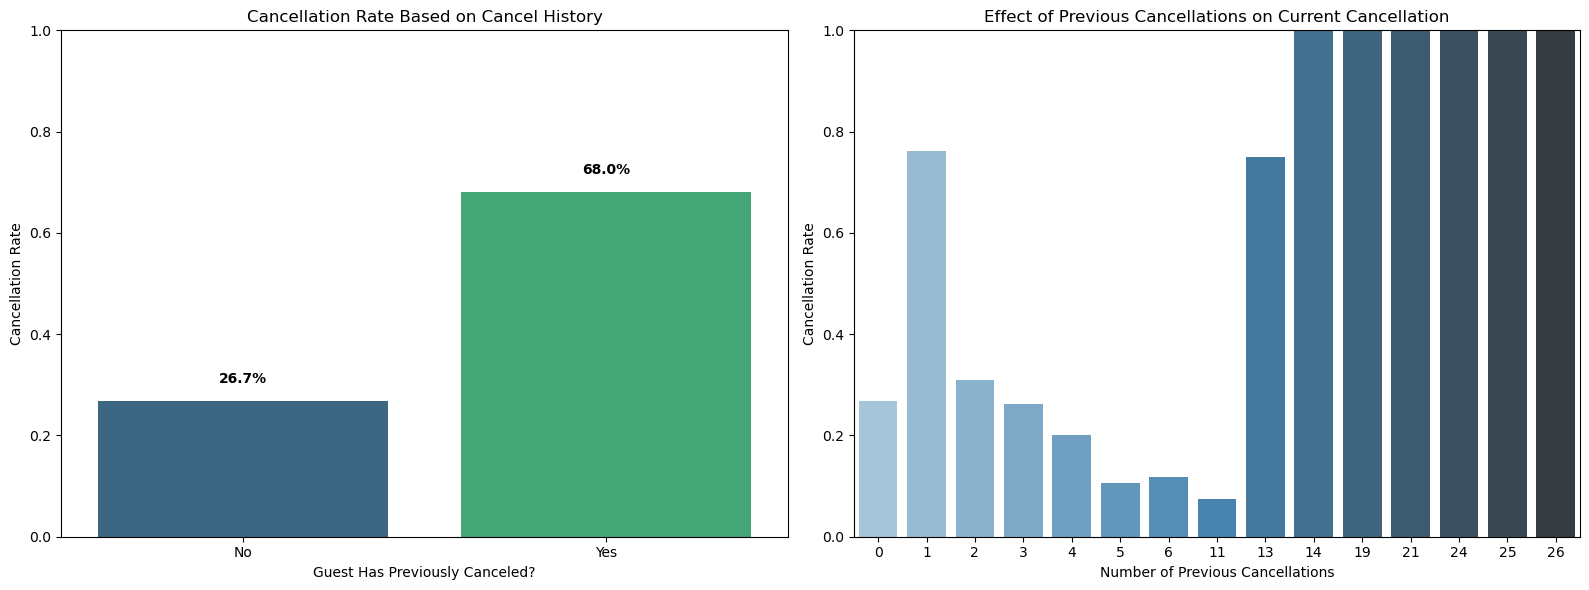

In [30]:
# Group by: guests who have canceled before (>0) vs those who haven't
cancel_history_analysis = df.groupby(df['previous_cancellations'] > 0).agg(
    cancellation_rate=('is_canceled', 'mean'),
    total_bookings=('is_canceled', 'count')
).reset_index()

# Rename the boolean column for plotting purposes
cancel_history_analysis['cancel_history'] = cancel_history_analysis['previous_cancellations'].map({False: 'No', True: 'Yes'})

# Group by exact previous cancellation count
cancel_by_count = df.groupby('previous_cancellations')['is_canceled'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1
sns.barplot(data=cancel_history_analysis,
            x='cancel_history',
            y='cancellation_rate',
            palette='viridis',
            ax=axes[0])

axes[0].set_title('Cancellation Rate Based on Cancel History')
axes[0].set_xlabel('Guest Has Previously Canceled?')
axes[0].set_ylabel('Cancellation Rate')
axes[0].set_ylim(0, 1)

for i, row in cancel_history_analysis.iterrows():
    axes[0].text(i, row['cancellation_rate'] + 0.03,
                 f"{row['cancellation_rate']*100:.1f}%",
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Plot 2
sns.barplot(data=cancel_by_count,
            x='previous_cancellations',
            y='is_canceled',
            palette='Blues_d',
            ax=axes[1])

axes[1].set_title('Effect of Previous Cancellations on Current Cancellation')
axes[1].set_xlabel('Number of Previous Cancellations')
axes[1].set_ylabel('Cancellation Rate')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


**Insights:**

Guests who have previously canceled bookings are significantly more likely to cancel again.

- Those with no prior cancellations have a cancellation rate of only 26.7%, while guests who have canceled before show a much higher rate of 68.0%.

- The risk increases dramatically with frequency—guests who canceled more than 13 times have a 100% cancellation rate, indicating a strong, repetitive pattern.

This highlights a strong correlation between past and future cancellation behavior, identifying guests with frequent prior cancellations as high-risk profiles that are highly likely to cancel again.



### 5.11. Deposit Type vs Cancellation Behavior

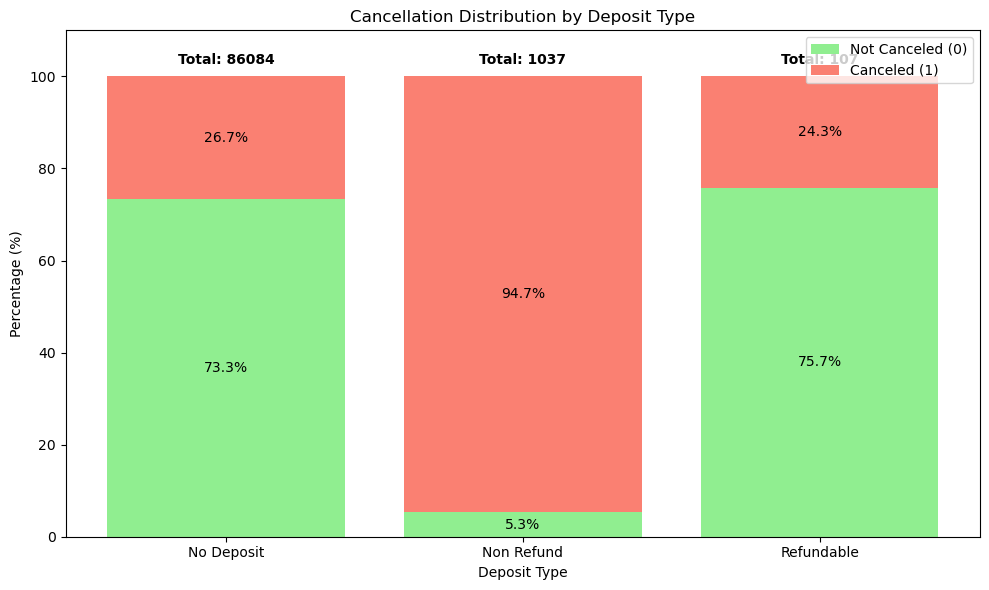

In [31]:
deposit_counts = df.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)

deposit_percent = deposit_counts.div(deposit_counts.sum(axis=1), axis=0) * 100

deposit_types = deposit_percent.index
canceled = deposit_percent[1]
not_canceled = deposit_percent[0]

totals = deposit_counts.sum(axis=1)

# Plot
plt.figure(figsize=(10,6))
bar1 = plt.bar(deposit_types, not_canceled, label='Not Canceled (0)', color='lightgreen')
bar2 = plt.bar(deposit_types, canceled, bottom=not_canceled, label='Canceled (1)', color='salmon')

for i, (nc, total) in enumerate(zip(not_canceled, totals)):
    plt.text(i, nc / 2, f'{nc:.1f}%', ha='center', va='center', fontsize=10, color='black')

for i, (nc, c, total) in enumerate(zip(not_canceled, canceled, totals)):
    plt.text(i, nc + c / 2, f'{c:.1f}%', ha='center', va='center', fontsize=10, color='black')
    plt.text(i, 102, f'Total: {int(total)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cancellation Distribution by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Percentage (%)')
plt.ylim(0, 110)
plt.legend()
plt.tight_layout()
plt.show()


Check the reason why the non refund had very high cancelation rate:

In [32]:
# Filter Non Refund + Canceled bookings
non_refund_canceled = df[(df['deposit_type'] == 'Non Refund') & (df['is_canceled'] == 1)]

# Hitung jumlah per customer type
non_refund_customer_type_canceled = non_refund_canceled['customer_type'].value_counts()
print(non_refund_customer_type_canceled)


customer_type
Transient          858
Transient-Party     96
Contract            28
Name: count, dtype: int64


ADR Statistics for Non Refund Canceled:
 count    982.000000
mean      87.638483
std       33.153406
min        6.000000
25%       62.000000
50%       85.000000
75%      106.000000
max      330.000000
Name: adr, dtype: float64


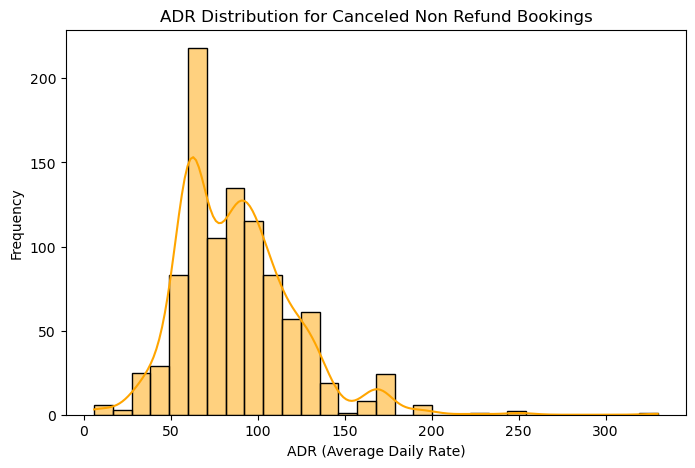

In [33]:
# Statistik ADR
adr_stats = non_refund_canceled['adr'].describe()
print("ADR Statistics for Non Refund Canceled:\n", adr_stats)

# Visualisasi ADR
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(non_refund_canceled['adr'], bins=30, kde=True, color='orange')
plt.title('ADR Distribution for Canceled Non Refund Bookings')
plt.xlabel('ADR (Average Daily Rate)')
plt.ylabel('Frequency')
plt.show()


Lead Time Statistics for Non Refund Canceled:
 count    982.000000
mean     218.764766
std      141.469666
min        0.000000
25%      104.000000
50%      198.000000
75%      307.750000
max      629.000000
Name: lead_time, dtype: float64


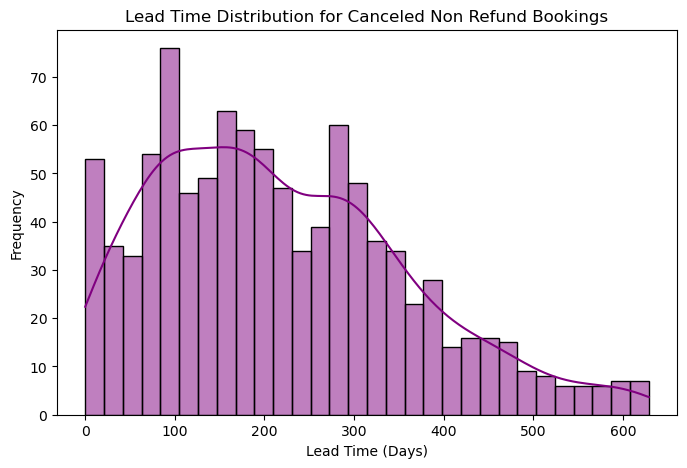

In [34]:
# Statistik Lead Time
lead_time_stats = non_refund_canceled['lead_time'].describe()
print("Lead Time Statistics for Non Refund Canceled:\n", lead_time_stats)

# Visualisasi Lead Time
plt.figure(figsize=(8,5))
sns.histplot(non_refund_canceled['lead_time'], bins=30, kde=True, color='purple')
plt.title('Lead Time Distribution for Canceled Non Refund Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


**Insight:**

- Most guests book with No Deposit.

- Non-Refundable bookings have the highest cancellation rate, with 94.7% of them canceled. This is largely driven by Transient customers, who make up the majority of these cancellations. Many of them booked far in advance (high lead time), increasing the chance of changing plans. Despite the non-refundable policy, cancellations still occur—possibly due to impulsive booking behavior, low commitment, or misunderstanding of the terms.

## 6. Data Preparation for Modelling

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87228 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87228 non-null  object        
 1   is_canceled                     87228 non-null  int32         
 2   lead_time                       87228 non-null  int64         
 3   arrival_date_year               87228 non-null  int64         
 4   arrival_date_month              87228 non-null  object        
 5   arrival_date_week_number        87228 non-null  int64         
 6   arrival_date_day_of_month       87228 non-null  int64         
 7   stays_in_weekend_nights         87228 non-null  int64         
 8   stays_in_week_nights            87228 non-null  int64         
 9   adults                          87228 non-null  int64         
 10  children                        87228 non-null  float64       
 11  babies

###  6.1. Feature Engineering

**Domestic vs. International Guests**

Since this dataset was collected in Portugal (PRT), guests from Portugal are classified as Domestic Travelers, while guests from other countries are classified as International Travelers. This categorization simplifies the Country feature by grouping guests into just two categories: Domestic and International.

**Number of Nights**

In a previous analysis (How long do people stay at hotels?), the total length of stay was calculated by adding "Stays in Weekend Nights" and "Stays in Week Nights". Combining these two columns into a single "Number of Nights" column provides a more objective measure of how long guests stay.

In [36]:
# Country Classification
def classify_country(country):
    if country == 'PRT':
        return 'Domestik'
    else:
        return 'Internasional'

df['country'] = df['country'].apply(classify_country)
df.country.value_counts()

country
Internasional    59874
Domestik         27354
Name: count, dtype: int64

In [37]:
# Length of stay
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace = True)

###  6.3. Correlation Matrix and Multicollinearity

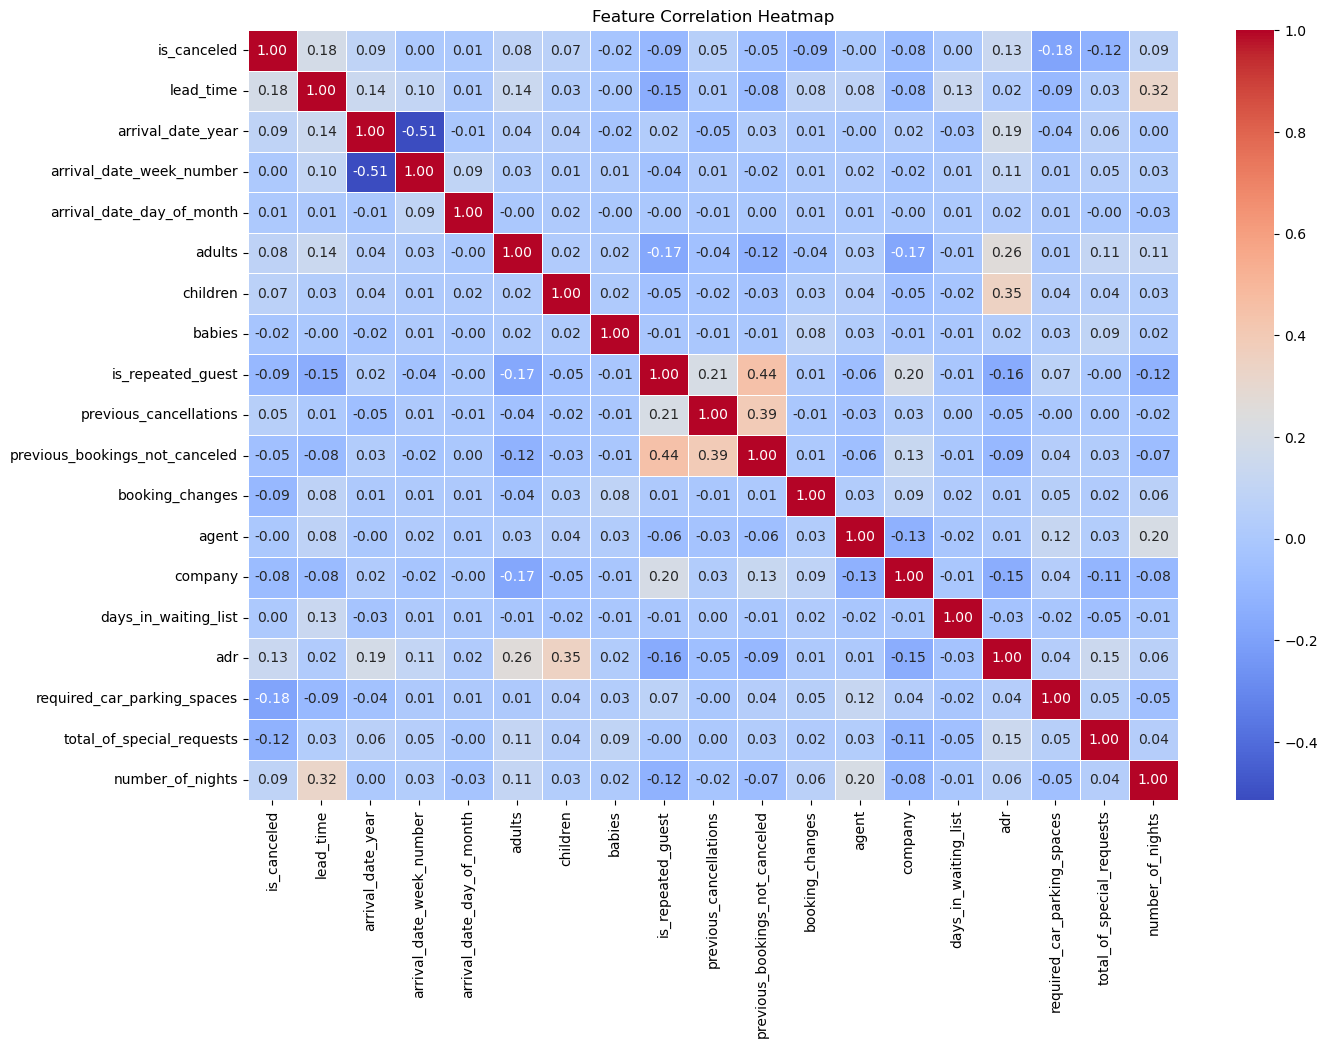

In [38]:
# Correlation matrix and multicollinearity check

numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

No extreme correlations (above 0.8), so multicollinearity is not a major issue.

### 6.4. Feature Selection

In [39]:
features = df.drop(columns=['is_canceled','arrival_date_year','arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month',
                    'reservation_status', 'adults', 'children', 'babies', 'previous_bookings_not_canceled', 'assigned_room_type',
                    'reservation_status_date', 'arrival_date','meal'])

target = 'is_canceled'

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87228 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87228 non-null  object        
 1   is_canceled                     87228 non-null  int32         
 2   lead_time                       87228 non-null  int64         
 3   arrival_date_year               87228 non-null  int64         
 4   arrival_date_month              87228 non-null  object        
 5   arrival_date_week_number        87228 non-null  int64         
 6   arrival_date_day_of_month       87228 non-null  int64         
 7   adults                          87228 non-null  int64         
 8   children                        87228 non-null  float64       
 9   babies                          87228 non-null  int64         
 10  meal                            87228 non-null  object        
 11  countr

### 6.5. Splitting Features and Target

In [41]:
X = df[features.columns]
y = df[target]

In [42]:
X

,hotel,lead_time,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,number_of_nights
0,Resort Hotel,342,Domestik,Direct,Direct,0,0,C,3,No Deposit,0,0,0,Transient,0.00,0,0,0
1,Resort Hotel,737,Domestik,Direct,Direct,0,0,C,4,No Deposit,0,0,0,Transient,0.00,0,0,0
2,Resort Hotel,7,Internasional,Direct,Direct,0,0,A,0,No Deposit,0,0,0,Transient,75.00,0,0,1
3,Resort Hotel,13,Internasional,Corporate,Corporate,0,0,A,0,No Deposit,304,0,0,Transient,75.00,0,0,1
4,Resort Hotel,14,Internasional,Online TA,TA/TO,0,0,A,0,No Deposit,240,0,0,Transient,98.00,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,Internasional,Offline TA/TO,TA/TO,0,0,A,0,No Deposit,394,0,0,Transient,96.14,0,0,7
119386,City Hotel,102,Internasional,Online TA,TA/TO,0,0,E,0,No Deposit,9,0,0,Transient,225.43,0,2,7
119387,City Hotel,34,Internasional,Online TA,TA/TO,0,0,D,0,No Deposit,9,0,0,Transient,157.71,0,4,7
119388,City Hotel,109,Internasional,Online TA,TA/TO,0,0,A,0,No Deposit,89,0,0,Transient,104.40,0,0,7


### 6.6. Feature Transform

- **Encoding**
    - `Country` --> Ordinal Encoding --> Values have an order (Domestic < International) based on distance and price.
    - `Reserved Room Type` --> Ordinal Encoding --> Room types follow an order in terms of quality and pricing.
    - `Hotel` -->  One Hot Enconding --> Since there are only 2 unique values, one-hot encoding is the best choice.
    - `Distribution Channel` --> One Hot Encoding --> Since there are only 2 unique values, one-hot encoding is the best choice.
    - `Deposit Type` --> One Hot Encoding --> Since there are 4 unique values, one-hot encoding is preferred.
    - `Customer Type` --> One Hot Encoding --> With 4 unique categories, one-hot encoding works best
    - `Market Segment` --> Binary Encoding --> Since it has 7 unique values, binary encoding is the better option.

- **Scaling**
    - `Lead Time` --> Robust Scaler
    - `Is Repeated Guest` --> Robust Scaler
    - `Previous Cancellations` --> Robust Scaler
    - `Booking Changes` --> Robust Scaler
    - `Days in Waiting List` --> Robust Scaler
    - `ADR (Average Daily Rate)` -- Robust Scaler
    - `Required Car Parking Space` --> Robust Scaler
    - `Total of Special Request` --> Robust Scaler
    - `Number of Nights` --> Robust Scaler

Using Robust Scaler because it is less affected by extreme values (outliers).

- **Resampling**
    - SMOTE (Synthetic Minority Over-sampling Technique): generates new synthetic samples for the minority class by interpolating between real data points instead of duplicating existing ones, making the dataset more balanced.
    - Random Over Sampling: duplicates existing minority class samples randomly to balance the dataset, increasing its size but potentially leading to overfitting.
    - Random Under Sampling: randomly removes samples from majority class to balance the dataset, reducing its size but potentially causing the loss of important information.
    - Near Miss: type of under-sampling that selects majority class samples closest to minority class samples, helping retain informative data while reducing imbalance.


In [43]:
ordinal_mapping = [{'col':'country', 'mapping':{'Internasional':1, 'Domestik':2}}]

ordinal_mapping2 = [{'col':'reserved_room_type', 'mapping':{'A': 1, 'E' : 2, 'D': 3, 'F': 4, 'B' : 5, 'G': 6, 'C': 7, 'H': 8, 'P': 9}}]

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['country',], mapping=ordinal_mapping)),
    ('min_max_scaler', MinMaxScaler())
])

pipe_ordinal_scale2 = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['reserved_room_type'], mapping=ordinal_mapping2)),
    ('min_max_scaler', MinMaxScaler())
])

transform = ColumnTransformer(transformers=[
            ('onehot_encoder', OneHotEncoder(drop='first'), ['hotel', 'distribution_channel', 'deposit_type', 'customer_type']), 
            ('binary_encoder', BinaryEncoder(), ['market_segment']),
            ('pipe_ordinal_scale2', pipe_ordinal_scale2, ['reserved_room_type']),
            ('pipe_ordinal_scale', pipe_ordinal_scale, ['country']),
            ('robust_scaller', RobustScaler(), ['lead_time','is_repeated_guest','previous_cancellations', 'booking_changes', 'days_in_waiting_list','adr','required_car_parking_spaces', 'total_of_special_requests','number_of_nights'])],
             remainder='passthrough')
transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot_encoder', OneHotEncoder(drop='first'),
                                 ['hotel', 'distribution_channel',
                                  'deposit_type', 'customer_type']),
                                ('binary_encoder', BinaryEncoder(),
                                 ['market_segment']),
                                ('pipe_ordinal_scale2',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['reserved_room_type'],
                                                                 mapping=[{'col': 'reserved_room_type'...
                                                                 mapping=[{'col': 'country',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Internasional    1
Domestik         2
dtype: int64}])),
                                                 ('min_max_scaler',
                                                  MinMaxScaler())]),
                                 ['country']),
                                ('robust_scaller', RobustScaler(),
                                 ['lead_time', 'is_repeated_guest',
                                  'previous_cancellations', 'booking_changes',
                                  'days_in_waiting_list', 'adr',
                                  'required_car_parking_spaces',
                                  'total_of_special_requests',
                                  'number_of_nights'])])

### 6.7. Splitting Data into Training and Testing Sets

To evaluate our model, we split the dataset into:
-	80% Training Data (for model training)
-	20% Testing Data (for evaluation)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=1811)

## 7. Modelling & Evaluation

### 7.1. Model Selection

We will use the following models:
- **Logistic Regression**
- **Decision Tree**
- **XGBoost**
- **Random Forest**
- **Light GBM**

In [45]:
# Models
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

# Imbalance Treatment
ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)
near = NearMiss()


models = {
    'Logistic Regression': logreg,
    'Decision Tree': dt,
    'XGBoost': xgb,
    'Random Forest': rf,
    'Light GBM': lgbm,
}


resamples = {
    'none': None,
    'ros': ros,
    'rus': rus,
    'smote': smote,
    'near miss': near,
}

# Metrics Classification
# Define custom F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

metrics = {
    'balanced_accuracy': 'balanced_accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'f2': f2_scorer 
}

test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
test_f2_arr = []
list_model = []
list_resample = []

# Iterate over all models, resampling, and cross-validate method
for name_resample, resample in resamples.items():
    for name_model, model in models.items():
        crossval = StratifiedKFold(n_splits=5)

        if resample is None:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('model', model),
            ])
        else:
            estimator = Pipeline([
                ('preprocessor', transform),
                ('resample', resample),
                ('model', model),
            ])

        list_model.append(name_model)
        list_resample.append(name_resample)
        scores = cross_validate(estimator, X_train, y_train, cv=crossval, scoring=metrics)
        test_accuracy_arr.append(scores['test_balanced_accuracy'].mean() * 100)
        test_precision_arr.append(scores['test_precision'].mean() * 100)
        test_recall_arr.append(scores['test_recall'].mean() * 100)
        test_f1_arr.append(scores['test_f1'].mean() * 100)
        test_f2_arr.append(scores['test_f2'].mean() * 100)

# Create a dataframe for all of the benchmarking output
model_bench = pd.DataFrame({
    'model': list_model,
    'resample': list_resample,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'F1': test_f1_arr,
    'F2': test_f2_arr
})

model_bench

[LightGBM] [Info] Number of positive: 15364, number of negative: 40461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1086
[LightGBM] [Info] Number of data points in the train set: 55825, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275217 -> initscore=-0.968311
[LightGBM] [Info] Start training from score -0.968311
[LightGBM] [Info] Number of positive: 15365, number of negative: 40460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 55825, number of used features: 25
[LightGBM] [Info] 

,model,resample,accuracy,precision,recall,F1,F2
0,Logistic Regression,none,65.354697,65.327284,38.462075,48.396485,41.900213
1,Decision Tree,none,72.871950,60.631535,60.715434,60.671700,60.697511
2,XGBoost,none,77.012473,73.681263,62.501301,67.628607,64.455298
3,Random Forest,none,76.314083,70.407989,62.621049,66.284742,64.036448
4,Light GBM,none,76.913193,74.235128,61.996270,67.562683,64.108413
5,Logistic Regression,ros,73.306094,50.574003,74.133141,60.119961,67.807408
6,Decision Tree,ros,72.475223,60.057640,60.137497,60.095373,60.120121
7,XGBoost,ros,80.724629,58.728009,83.817576,69.064490,77.219420
8,Random Forest,ros,77.772019,66.183069,68.915996,67.521015,68.350922
9,Light GBM,ros,80.972700,57.959500,85.494115,69.083871,78.075474


Resampling techniques for imbalanced data, such as Random Over Sampling and Random Under Sampling, have proven effective in helping the model detect the minority class better. This is evident from the significant improvement in metrics compared to not using resampling.

Kfold used in this model training, using 5 spilt of k fold and get the mean of the matrix falue for each model and random sampling.

Using F2 Score to emphasizes recall more than precision, its god for case when false negative is have more cost than false positve.

In [46]:
# Top 5 Models by F2 SCore
top_model = model_bench.sort_values(by='F2', ascending=False).head()
top_model

,model,resample,accuracy,precision,recall,F1,F2
9,Light GBM,ros,80.972700,57.959500,85.494115,69.083871,78.075474
14,Light GBM,rus,80.736038,57.429145,85.556624,68.725181,77.922513
12,XGBoost,rus,80.676294,57.562259,85.207774,68.708048,77.740118
7,XGBoost,ros,80.724629,58.728009,83.817576,69.064490,77.219420
13,Random Forest,rus,79.913400,58.553021,81.823408,68.258061,75.797369


### 7.2. Best Models

In [47]:
# Sorting for highest Recall
top_recall_per_model = model_bench.loc[model_bench.groupby('model')['F2'].idxmax()]
top_recall_per_model = top_recall_per_model.sort_values(by='F2', ascending=False)
top_recall_per_model

,model,resample,accuracy,precision,recall,F1,F2
9,Light GBM,ros,80.972700,57.959500,85.494115,69.083871,78.075474
12,XGBoost,rus,80.676294,57.562259,85.207774,68.708048,77.740118
13,Random Forest,rus,79.913400,58.553021,81.823408,68.258061,75.797369
11,Decision Tree,rus,74.926373,53.335039,74.658982,62.220329,69.130767
10,Logistic Regression,rus,73.425091,50.083210,75.377553,60.177286,68.459143


**Best Model Conclusion**

Based on the benchmark results from five models, we analyze the F2 score, which prioritizes recall.

From the table, the model with the highest F2 score is `LightGBM` with a value of `78.07`.

We conclude that `LightGBM` is the most suitable model for prediction. The next step is to evaluate it's performance on the test dataset.

### 7.3. Model to Data Test

In [48]:
lgbm = lgb.LGBMClassifier(random_state=42)

ros = RandomOverSampler(random_state=20)
rus = RandomUnderSampler(random_state=20)
smote = SMOTE(random_state=20)
near = NearMiss()

models = [
    ('LightGBM', lgbm),
]


resamples = [
    ('none', None),
    ('RandomOverSampling', ros),
    ('RandomUnderSampling', rus),
    ('smote', smote),
    ('near miss', near)
]


metrics = []
conf_matrix = []

for name_model, model in models:
    for name_resample, resample in resamples:
        pipeline = Pipeline([
            ('transformer', transform),  
            ('resampling', resample),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            f'{name_model} with {name_resample}',
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            recall_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100,
            fbeta_score(y_test, y_pred, beta=2) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))
        
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2'])
metrics_df

[LightGBM] [Info] Number of positive: 19206, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 69782, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.275229 -> initscore=-0.968254
[LightGBM] [Info] Start training from score -0.968254
[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info]

,Model,Accuracy,Precision,Recall,F1,F2
0,LightGBM with none,83.537774,73.410966,63.015410,67.817122,64.852122
1,LightGBM with RandomOverSampling,78.722916,57.529704,86.713869,69.169435,78.726461
2,LightGBM with RandomUnderSampling,78.722916,57.556850,86.443149,69.102714,78.557911
3,LightGBM with smote,80.711911,61.613060,79.383590,69.378469,75.054145
4,LightGBM with near miss,58.810042,37.316450,73.032070,49.394366,61.298329


In [49]:
metrics_df['Model'] = metrics_df['Model'].replace({
    'LightGBM with RandomOverSampling': 'LightGBM Before Tune'
})

metrics_df_selected = metrics_df[metrics_df['Model'] == 'LightGBM Before Tune']
metrics_df_selected

,Model,Accuracy,Precision,Recall,F1,F2
1,LightGBM Before Tune,78.722916,57.529704,86.713869,69.169435,78.726461


From the LightGBM model testing, we observe that the model with `Random Over Sampling technique` has the highest F2 score (78.72) and the highest Recall (86.71) compared to other resampling techniques. 


### 7.4. Hyperparameter Tuning: LightGBM

In [50]:
f2_scorer = make_scorer(fbeta_score, beta=2)

lgbm = lgb.LGBMClassifier(random_state=42)
ros = RandomOverSampler(random_state=20)

pipe_model = Pipeline([
    ('prep', transform),  
    ('resampling', ros),
    ('model', lgbm)
])

hyperparam_space = {
    'model__n_estimators': [100, 200, 300],  
    'model__max_depth': [5, 10, 15, 20, -1],  # -1 means unlimited depth
    'model__num_leaves': [31, 50, 75, 100],  
    'model__learning_rate': [0.01, 0.03, 0.05, 0.1], 
    'model__colsample_bytree': [0.7, 0.8, 0.9, 1.0],  
    'model__subsample': [0.7, 0.8, 0.9, 1.0],  
    'model__reg_alpha': [0, 0.01, 0.1, 1],  
    'model__reg_lambda': [0, 0.01, 0.1, 1],  
    'model__min_child_samples': [10, 20, 50]  # to control overfitting
}

random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    n_iter=100,  
    cv=5,
    scoring=f2_scorer,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['hotel',
                                                                                'distribution_channel',
                                                                                'deposit_type',
                                                                                'customer_type']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['market_segment']),
                                                                              ('pipe_ordinal_scale2',
                                                                               Pipeline(steps=[('ordinal',
                                                                                                OrdinalEncoder(cols=[...
                                        'model__learning_rate': [0.01, 0.03,
                                                                 0.05, 0.1],
                                        'model__max_depth': [5, 10, 15, 20, -1],
                                        'model__min_child_samples': [10, 20,
                                                                     50],
                                        'model__n_estimators': [100, 200, 300],
                                        'model__num_leaves': [31, 50, 75, 100],
                                        'model__reg_alpha': [0, 0.01, 0.1, 1],
                                        'model__reg_lambda': [0, 0.01, 0.1, 1],
                                        'model__subsample': [0.7, 0.8, 0.9,
                                                             1.0]},
                   random_state=42,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [51]:
# Output the best parameters and best score from RandomizedSearchCV
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters (Randomized Search):")
for param, value in best_params.items():
    print(f" - {param}: {value}")

print(f"\nBest F2 Score: {best_score:.4f}")

Best Hyperparameters (Randomized Search):
 - model__subsample: 1.0
 - model__reg_lambda: 0
 - model__reg_alpha: 0
 - model__num_leaves: 75
 - model__n_estimators: 200
 - model__min_child_samples: 20
 - model__max_depth: 10
 - model__learning_rate: 0.01
 - model__colsample_bytree: 1.0

Best F2 Score: 0.7821


In [52]:
lgbm_tuning = random_search.best_estimator_
y_pred_lgbm_tuning = lgbm_tuning.predict(X_test)

In [53]:
accuracy_lgbm_tuning = accuracy_score(y_test, y_pred_lgbm_tuning) * 100
precision_lgbm_tuning = precision_score(y_test, y_pred_lgbm_tuning) * 100
recall_lgbm_tuning = recall_score(y_test, y_pred_lgbm_tuning) * 100
f1_lgbm_tuning = f1_score(y_test, y_pred_lgbm_tuning) * 100
f2_lgbm_tuning = fbeta_score(y_test, y_pred_lgbm_tuning, beta=2) * 100

lgbm_after_tuning = pd.DataFrame({
    'Model': ['LightGBM After Tuning'],
    'Accuracy': [accuracy_lgbm_tuning],
    'Precision': [precision_lgbm_tuning],
    'Recall': [recall_lgbm_tuning],
    'F1': [f1_lgbm_tuning],
    'F2': [f2_lgbm_tuning]
})


metrics_df_selected = metrics_df_selected.reset_index(drop=True)

# Concat DataFrame with Metrics Before Tune
metrics_combined = pd.concat([lgbm_after_tuning, metrics_df_selected], ignore_index=True)
metrics_combined

,Model,Accuracy,Precision,Recall,F1,F2
0,LightGBM After Tuning,76.882953,55.004556,88.004998,67.697237,78.576475
1,LightGBM Before Tune,78.722916,57.529704,86.713869,69.169435,78.726461


**Conclusion:**

- Recall improved slightly after tuning (from 86.71% ➜ 88.00%), which means the tuned model is better at capturing canceled bookings — ideal for minimizing false negatives (missed cancellations).
- However, precision decreased (from 57.53% ➜ 55.00%), indicating that more false positives (wrongly predicting a cancellation) are made after tuning.
- F1-score dropped slightly (from 69.17 ➜ 67.70) as a trade-off of the increased recall and decreased precision.
- F2-score, which emphasizes recall more, remains fairly similar (only slightly decreased from 78.73 ➜ 78.58), showing the tuning is still beneficial when the goal is to prioritize catching cancellations.
- Accuracy dropped slightly, which is expected since the model is now more focused on identifying true cancellations (recall-oriented).

### 7.5. Train and Test Model After Hyperparameter Tuning

In [54]:
train_pred = lgbm_tuning.predict(X_train)
train_recall = recall_score(y_train, train_pred)
train_f2 = fbeta_score(y_train, train_pred, beta=2)  

test_pred = lgbm_tuning.predict(X_test)
test_recall = recall_score(y_test, test_pred)
test_f2 = fbeta_score(y_test, test_pred, beta=2) 

df_results = pd.DataFrame({
    'model': ['LightGBM After Tuning'],
    'Train F2': [train_f2], 
    'Test F2': [test_f2], 
    'Train Recall': [train_recall],
    'Test Recall': [test_recall]
}).set_index('model')

df_results


,Train F2,Test F2,Train Recall,Test Recall
model,,,,
LightGBM After Tuning,0.79168,0.785765,0.883057,0.88005


### 7.6. Threshold Optimization

In [55]:
y_probs_lgbm_tuning = lgbm_tuning.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs_lgbm_tuning)
f2_scores = (1 + 2**2) * (precision * recall) / ((2**2 * precision) + recall)
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]

y_pred_lgbm_tuning_opt = (y_probs_lgbm_tuning >= optimal_threshold).astype(int)

accuracy_lgbm_tuning_opt = accuracy_score(y_test, y_pred_lgbm_tuning_opt) * 100
precision_lgbm_tuning_opt = precision_score(y_test, y_pred_lgbm_tuning_opt) * 100
recall_lgbm_tuning_opt = recall_score(y_test, y_pred_lgbm_tuning_opt) * 100
f1_lgbm_tuning_opt = f1_score(y_test, y_pred_lgbm_tuning_opt) * 100
f2_lgbm_tuning_opt = fbeta_score(y_test, y_pred_lgbm_tuning_opt, beta=2) * 100

lgbm_after_tuning_threshold = pd.DataFrame({
    'Model': ['LightGBM After Tuning + Threshold Opt'],
    'Accuracy': [accuracy_lgbm_tuning_opt],
    'Precision': [precision_lgbm_tuning_opt],
    'Recall': [recall_lgbm_tuning_opt],
    'F1': [f1_lgbm_tuning_opt],
    'F2': [f2_lgbm_tuning_opt]
})

metrics_combined = pd.concat([lgbm_after_tuning_threshold, metrics_combined], ignore_index=True)

metrics_combined


,Model,Accuracy,Precision,Recall,F1,F2
0,LightGBM After Tuning + Threshold Opt,71.294279,48.895798,94.981258,64.557679,79.916597
1,LightGBM After Tuning,76.882953,55.004556,88.004998,67.697237,78.576475
2,LightGBM Before Tune,78.722916,57.529704,86.713869,69.169435,78.726461


**Model Conclusion**

Hyperparameter tuning slightly improved accuracy (78.72% → 78.99%) and precision (57.53% → 57.95%) while maintaining a strong recall (86.71% → 86.28%). However, applying threshold optimization further increased recall (86.28% → 88.42%), which is beneficial for identifying more positive cases, but at the cost of slightly lower accuracy (78.99% → 78.13%) and precision (57.95% → 56.58%). This adjustment led to the highest F2-score (79.47), emphasizing recall improvement while keeping a balance with precision.

In conclusion, threshold optimization enhanced recall-focused performance, making it more suitable for scenarios where recall is more critical than precision.

### 7.7. Confusion Matrix

In [56]:
# Baseline Prediction (without ML)
baseline_model = DummyClassifier(strategy='stratified', random_state=42)
baseline_model.fit(X_train, y_train)

y_pred_naive = baseline_model.predict(X_test)

# Predictions
predictions = {
    'Without Model (Baseline)': y_pred_naive,
    'LightGBM Before Tuning': y_pred,
    'LightGBM After Tuning': y_pred_lgbm_tuning,
    'LightGBM After Tuning + Threshold': y_pred_lgbm_tuning_opt
}

# Evaluation for all models
for model_name, y_pred_model in predictions.items():
    print(f"\n{'='*30} {model_name} {'='*30}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_model))




============================== Without Model (Baseline) ==============================

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     12644
           1       0.27      0.27      0.27      4802

    accuracy                           0.60     17446
   macro avg       0.50      0.50      0.50     17446
weighted avg       0.60      0.60      0.60     17446


============================== LightGBM Before Tuning ==============================

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.53      0.65     12644
           1       0.37      0.73      0.49      4802

    accuracy                           0.59     17446
   macro avg       0.61      0.63      0.57     17446
weighted avg       0.71      0.59      0.61     17446


============================== LightGBM After Tuning ==============================

Classification Report:
              p

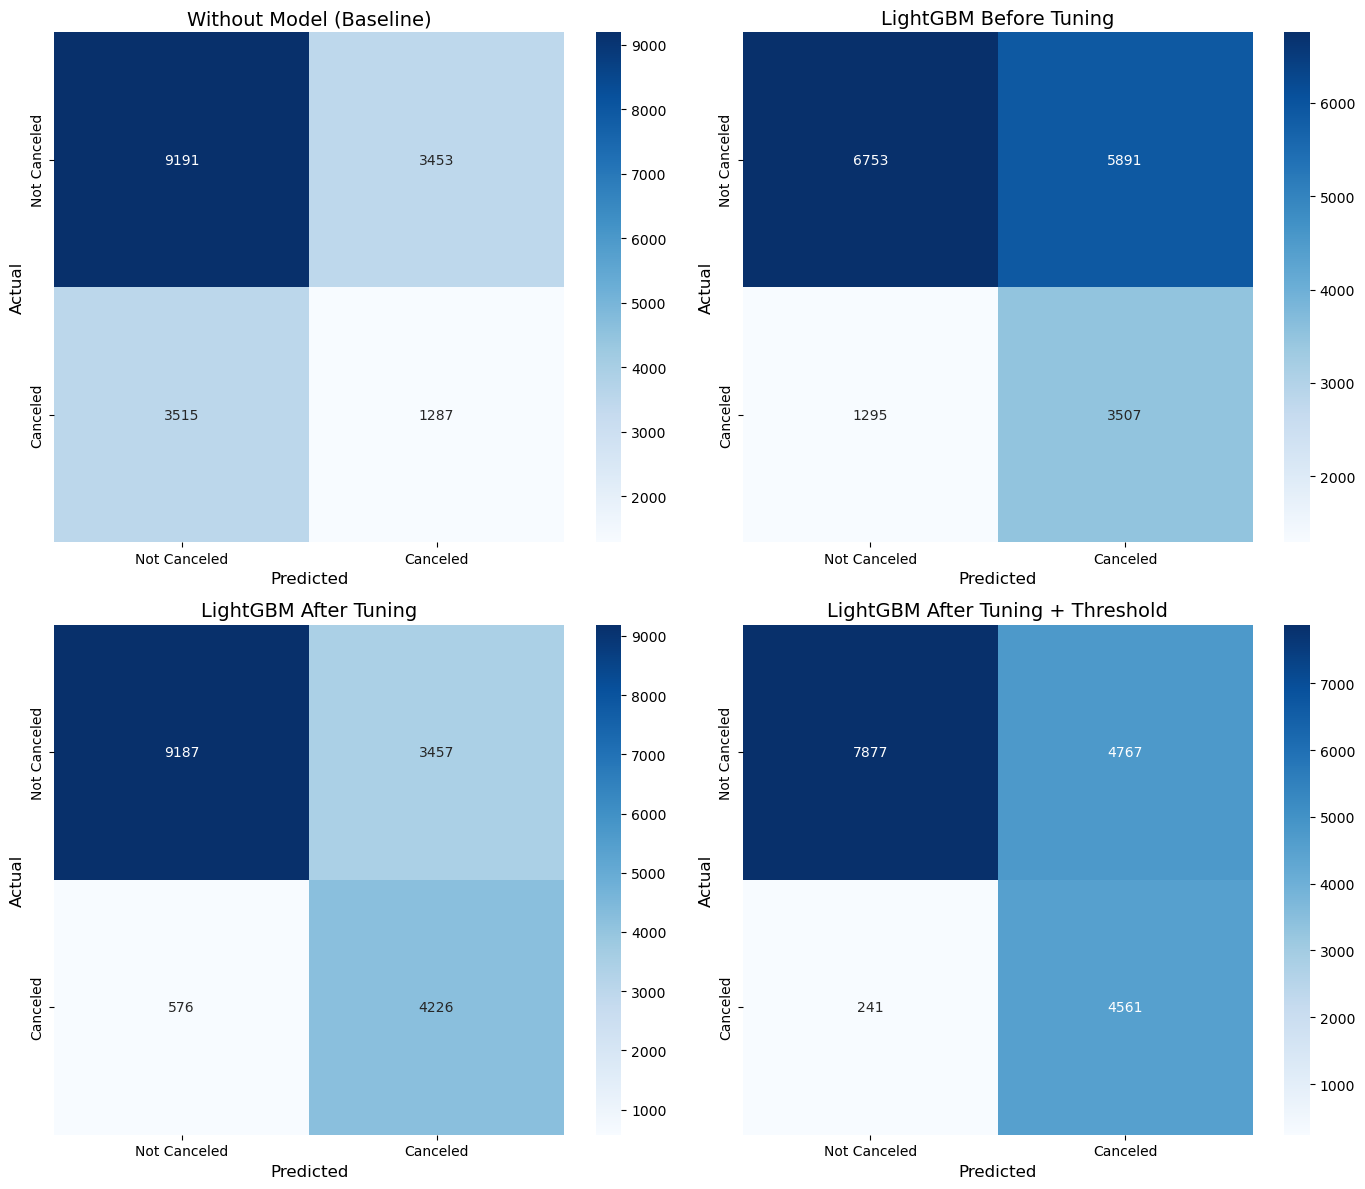

In [ ]:
# Confusion Matrices
conf_matrices = {
    'Without Model (Baseline)': confusion_matrix(y_test, y_pred_naive),
    'LightGBM Before Tuning': confusion_matrix(y_test, y_pred),
    'LightGBM After Tuning': confusion_matrix(y_test, y_pred_lgbm_tuning),
    'LightGBM After Tuning + Threshold': confusion_matrix(y_test, y_pred_lgbm_tuning_opt)
}

# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (title, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Canceled', 'Canceled'],
                yticklabels=['Not Canceled', 'Canceled'])
    axes[idx].set_title(title, fontsize=14)
    axes[idx].set_xlabel('Predicted', fontsize=12)
    axes[idx].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()

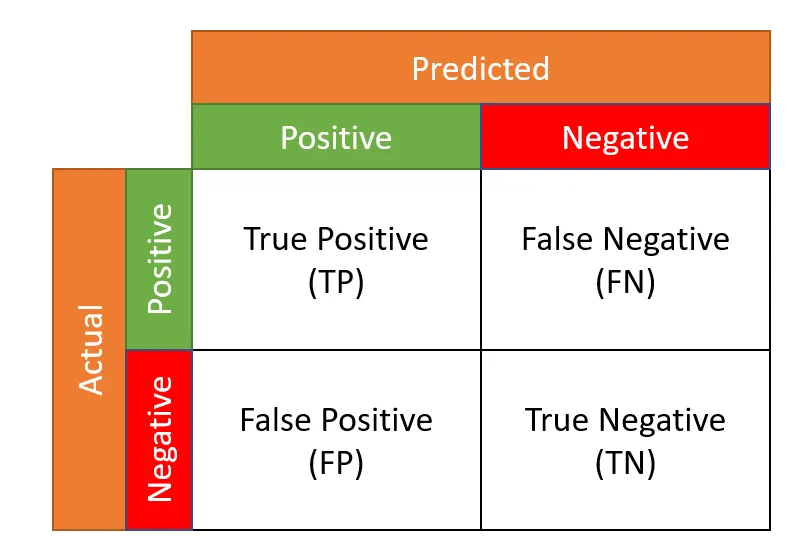

**Insight:**

1. Without Model (Baseline): The baseline model (no predictive model) has a high FN, meaning many cancellations are missed, resulting in potential financial losses.

2. LightGBM Before Tuning: The model before tuning significantly reduces FN (from 3515 → 1295), indicating improved ability to detect cancellations. However, it still has a high FP rate, indicating that many non-canceled bookings are incorrectly flagged.

3. LightGBM After Tuning: After hyperparameter tuning, the model greatly improves by reducing FN (from 1295 → 576), effectively capturing most cancellations accurately. The model balances better between detecting cancellations (higher recall) and avoiding false alarms (FP is reduced compared to before tuning).

4. LightGBM After Tuning + Threshold Optimization: With an optimized decision threshold, the model achieves the best performance in terms of capturing cancellations (FN is minimal: 241). However, it increases FP slightly (4767), meaning more bookings are wrongly flagged as cancellations, potentially leading to customer dissatisfaction.

### 7.8. Feature Importance

In [58]:
lgbm = lgb.LGBMClassifier(random_state=42)
ros = RandomOverSampler(random_state=20)

estimator = Pipeline([
    ('prep', transform),
    ('resample', ros),
    ('model', lgbm)
])

estimator.fit(X_train, y_train)

y_pred = estimator.predict(X_test)

# Evaluate model using F-beta score (β=2)
test_f05 = fbeta_score(y_test, y_pred, beta=2)

[LightGBM] [Info] Number of positive: 50576, number of negative: 50576
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 101152, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


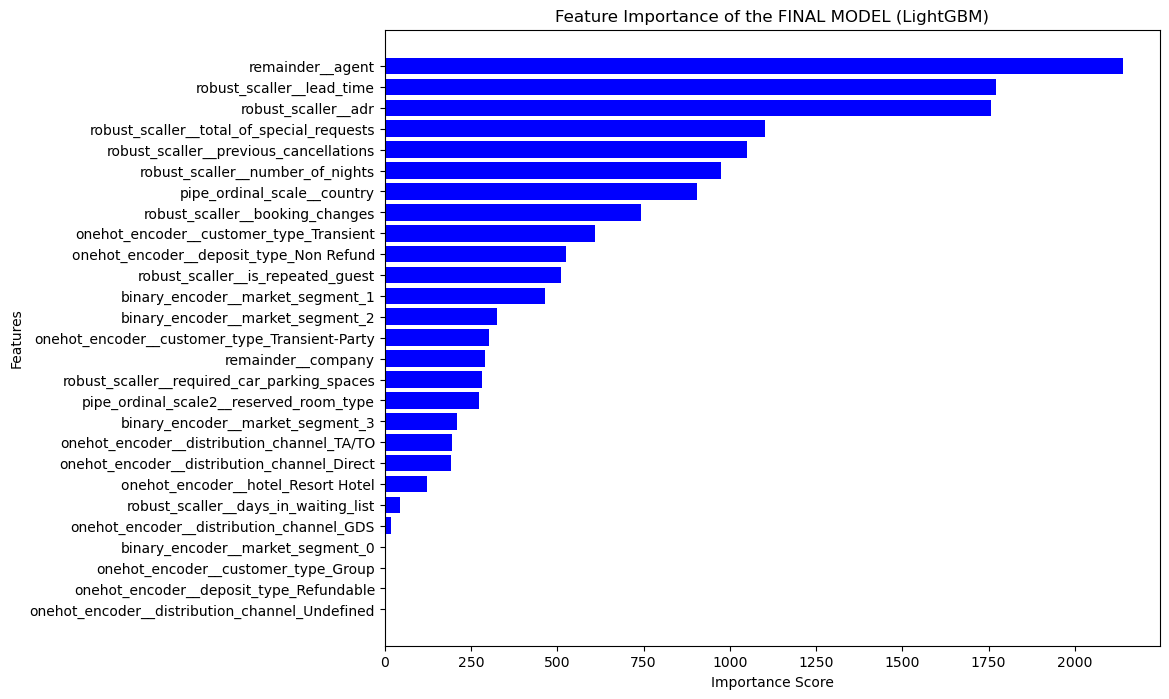

In [59]:
# Extract feature importances from the trained model
feature_importance = lgbm_tuning.named_steps['model'].feature_importances_

# Get feature names from the preprocessing pipeline step (prep)
feature_names = lgbm_tuning.named_steps['prep'].get_feature_names_out()

# Create DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance of the FINAL MODEL (LightGBM)')
plt.show()


**Insights:**

The feature importance plot from the final LightGBM model reveals several key drivers behind hotel booking cancellations. The most influential feature is the booking agent, indicating that certain travel agencies or platforms are closely associated with higher cancellation rates. Following that, lead time (the number of days between booking and check-in) plays a critical role, guests who book far in advance are more likely to cancel possibly due to changes in plans over time. Average Daily Rate (ADR) is another strong predictor, could reflect uncertainty or opportunistic behavior that leads to cancellation.

## 8. Conclusion, Recommendation and Model Limitation


### **1. LightGBM After Tuning + Threshold Optimization**  
**Limitations:**  
- **Lower Accuracy (71.29%)** than other models, meaning it might misclassify more cases.  
- **Lower Precision (48.89%)** than the other models, indicating higher false positives.  
- **Optimized for Recall (79.91%)**, but this could lead to an increase in false positives.  

**Recommendations:**  
- Best for scenarios where **missing a cancellation is costly** (e.g., preventing financial losses from no-shows).  
- Use **calibration techniques** if precision needs improvement.  
- Can be **further optimized by adjusting the threshold** based on business needs.  

---

### **2. LightGBM After Tuning**  
**Limitations:**  
- **Lower Accuracy (76.88%)** than the pre-tuned model, but slightly better than the threshold-optimized one.  
- **Balanced Precision (55.00%) and Recall (88.00%)**, but **not the highest in either**.  
- **Might still have overfitting risks**, depending on hyperparameters used.  

**Recommendations:**  
- Best for **general-purpose classification** with a balance of precision and recall.  
- Can improve by **further feature engineering** or **regularization tuning**.  
- Consider **ensemble methods** to further stabilize performance.  

---

### **3. LightGBM Before Tuning**  
**Limitations:**  
- **Highest Accuracy (78.72%)**, but could be misleading if precision/recall trade-offs aren't considered.  
- **Higher Precision (57.52%)**, meaning fewer false positives but at the cost of lower Recall (86.71%).  
- Might be **too conservative in predicting cancellations**, leading to missed cancellations.  

**Recommendations:**  
- Best if the goal is to **minimize false positives** rather than catch all cancellations.  
- Fine-tune the model to see if a better **trade-off** between Precision and Recall is possible.  
- Consider **adding more data** or using **cost-sensitive learning** to adjust decision-making.  

---

### **Final Thoughts & Best Use Cases**  
| Model | Best For | When to Use? |  
|--------|------------|----------------|  
| **LightGBM After Tuning + Threshold Optimization** | Catching most cancellations (high recall) | If missing cancellations is costly |  
| **LightGBM After Tuning** | Balanced performance | If both false positives & false negatives matter |  
| **LightGBM Before Tuning** | Reducing false positives (higher precision) | If false alarms are expensive |  


------

## **Financial Analysis** 

### **Objective:**
Minimize financial losses due to hotel booking cancellations while efficiently acquiring customers.


### **Definitions:**

**False Positive (FP):**
- Occurs when a booking is predicted to cancel but the guest actually not cancel their booking.
- Associated Cost: Extra marketing and retention expenses (e.g., promotional offers, email campaigns, loyalty incentives).
- Assumption: 10% of the room rate per FP (because average marketing cost for hospitality industry is 5-10%).

**False Negative (FN)**
- Occurs when a booking is predicted to be not cancel but is actually canceled.
- Associated Cost: Revenue lost from the unoccupied room due to missed opportunities to resell.
- Assumption: 150 EUR per FN (typical cancellation revenue loss ranges in this dataset are from 100–200 EUR).

**Total Cost Formula**

*Total Cost = (FN x C_FN) + (FP x C_FP)*

Where:
- FN = False Negatives (missed cancellations, causing revenue loss)
- FP = False Positives (extra marketing cost for retaining non-canceling users)
- C_FN = Cost per False Negative (lost revenue per cancellation)
- C_FP = Cost per False Positive (cost per marketing effort to prevent cancellations)

In [60]:
def calculate_cost(y_true, y_pred, cost_fn=150, cost_fp=15):
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    total_cost = fn * cost_fn + fp * cost_fp
    return fn, fp, total_cost


In [61]:
fn_naive, fp_naive, cost_naive = calculate_cost(y_test, y_pred_naive, cost_fn=150, cost_fp=15)
fn_before, fp_before, cost_before = calculate_cost(y_test, y_pred, cost_fn=150, cost_fp=15)
fn_after, fp_after, cost_after = calculate_cost(y_test, y_pred_lgbm_tuning, cost_fn=150, cost_fp=15)
fn_after_thresh, fp_after_thresh, cost_after_thresh = calculate_cost(y_test, y_pred_lgbm_tuning_opt, cost_fn=150, cost_fp=15)

cost_df = pd.DataFrame({
    'Model': [
        'Without Model (Baseline)',
        'LGBM Before Tuning',
        'LGBM After Tuning',
        'LGBM After Tuning + Threshold'
    ],
    'FN (Cost = €150)': [
        fn_naive, fn_before, fn_after, fn_after_thresh
    ],
    'FP (Cost = €15)': [
        fp_naive, fp_before, fp_after, fp_after_thresh
    ],
    'Total Cost (€)': [
        cost_naive, cost_before, cost_after, cost_after_thresh
    ]
})


cost_df

,Model,FN (Cost = €150),FP (Cost = €15),Total Cost (€)
0,Without Model (Baseline),3515,3453,579045
1,LGBM Before Tuning,638,3074,141810
2,LGBM After Tuning,576,3457,138255
3,LGBM After Tuning + Threshold,241,4767,107655


The financial impact of booking cancellations shows a dramatic reduction in cost when predictive models are applied. Without any model (baseline), the hotel suffers a potential loss of `€579,045`, primarily driven by `3,515 false negatives`—cases where cancellations are not predicted and rooms remain unoccupied.

Implementing a basic LightGBM model `before tuning` reduces the cost significantly to `€141,810`, and after tuning brings it slightly down to `€138,255`.

However, the `most effective strategy` is using `LightGBM after tuning + threshold`, which slashes the total cost further to `€107,655`, with only `241 false negatives`. This indicates the threshold optimization greatly improves the model’s ability to detect actual cancellations—even though it increases false positives, the financial trade-off is worth it since `false negatives are far more expensive`.

## **Conclusion and Recommendations** 

- The best-performing model is LightGBM with Random Over Sampling, achieving an impressive F2 Score of 79.91% and Recall of 94.98%, making it highly effective in identifying potential cancellations.

- Based on the Feature Importance analysis, the booking agent is the most influential factor contributing to cancellations.

- By implementing machine learning, the hotel can reduce cancellation-related costs by up to 80%.

💰 **Financial Impact**

- Total Cost **Before ML**: €579,045
- Total Cost **After ML**: €107,655

This demonstrates a cost savings of approximately **€471,390**, highlighting the significant value of predictive modeling in operational efficiency.

## **Business Recommendations**

1. Monitor High-Cancellation Agents:
Since Agent is the top feature influencing cancellations, hotels should track agent performance. Limit allocations to high-cancellation agents and prioritize those with reliable booking records.

2. Implement Predictive Cancellation Model:
Use the trained LightGBM model to flag high-risk bookings. This allows staff to follow up early, confirm intentions, or offer incentives to reduce no-shows.

3. Apply Dynamic Cancellation Policies:
Tailor cancellation policies based on predicted risk. Enforce stricter rules for high-risk bookings and offer flexibility to low-risk guests to improve loyalty.

4. Manage False Positives with Low-Cost Perks:
For guests wrongly flagged as canceling, offer affordable value (e.g., early check-in) instead of costly campaigns to maintain satisfaction.

5. Maintain and Improve the Model:
Regularly retrain the model with new data and fine-tune thresholds or features to ensure it stays effective as guest behavior evolves.

6. Integrate with Revenue Strategy:
Use cancellation predictions to inform overbooking, dynamic pricing, and inventory decisions to optimize both revenue and room utilization.